## European streamflow database

#### The main objective of this script is to start the posterior analysis of the concatenated data for Europe that now have their respective boundaries delineated either from official sources, or from the manual delineation employed. 

At this part we can start our posterior analysis after the concatenation, and boundaries delineation step.


The boundaries were retrieved either from the official sources, or delineated manually. Here we should give them labels, and select and observe which one are possible to be used in the future, and which ones not. 

Written by: Thiago Victor Medeiros do Nascimento


Link to database spreadsheet: https://docs.google.com/spreadsheets/d/1xS1mWGolKbkn2xthTIW6QNHNkPVV6TnwWXLgYqxAozM/edit#gid=0

In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pymannkendall as mk
from plotly.offline import plot
import contextily as cx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
import datetime
import tqdm as tqdm
import os
import glob
import calendar
import seaborn as sns

warnings.simplefilter(action='ignore', category=Warning)

In [2]:
%config Completer.use_jedi = False                           # This improve the auto-fill function

import geospatialfunctions as geospatialfunctions            # Geospatialfunctions is a module with useful functions

First we can set our working directory and check it:

In [3]:
path = r"C:\Users\nascimth\Documents\Thiago\Eawag\Python\Datasets"
os.chdir(path)
os.getcwd()

'C:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Datasets'

#### Countries currently available: 



1. Austria (AT)
2. Belgium (BE)
3. Belarus (BY)
4. Bosnia and Herzegovina (BA)
5. Croatia (HR)
6. Cyprus (CY)
7. Czechia (CZ)
8. Denmark (DK)
9. Estonia (EE)
10. Finland (FI)
11. France (FR)
12. Germany (DE)
13. Greece (GR) ***
14. Great Britain (GB)
15. Hungary (HU) ***
16. Iceland (IS)
17. Ireland (IE)
18. Italy (IT)
19. Latvia (LV)
20. Lithuania (LT)
21. Luxembourg (LU)
22. Netherlands (NL)
23. Northern Ireland (UK)
24. Norway (NO)
25. Poland (PL)
26. Portugal (PT)
27. Romania (RO)
28. Russia (RU)
29. Serbia (RS)
30. Slovakia (SK)
31. Slovenia (SI)
32. Spain (ES)
33. Sweden (SE)
34. Switzerland (CH)
_____________________________________
35. North Macedonia (MK)
36. Moldova (MD)
37. Ukraine (UA)
38. Turkey (TR)
39. Bulgaria (BG)


*** Countries requested but not yet available from the official website, however available from GRDC.

#### * Network information lecture per country:

In [4]:
timeseries_EU = pd.read_csv(r"EU\timeseries_EU.csv", index_col=0)
timeseries_EU.index = pd.to_datetime(timeseries_EU.index)
timeseries_EU.index.name = "dates"
timeseries_EU

AT00001  AT00002  AT00003  AT00004  AT00005  AT00006  AT00007  \
dates                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            AT00008  AT00009  AT00010  ...  TR00027  TR00028  BG00001  \
dates                                  ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  BG00008  
dates                                                                      
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[45290 rows x 11605 columns]

In [5]:
network_EU = pd.read_excel(r"EU\network_EU.xlsx")
network_EU.set_index("new_code", inplace = True)

network_EU

Unnamed: 0     code                 name           river      area  \
new_code                                                                       
AT00001            0   200014                Bangs           Rhein    4647.9   
AT00002            1   200048  Schruns (Vonbunweg)            Litz     102.0   
AT00003            2   231662        Loruens-Aeule             Ill     535.2   
AT00004            3   200592    Kloesterle (OEBB)          Alfenz      66.6   
AT00005            4   200097  Buers (Bruecke L82)          Alvier      72.2   
...              ...      ...                  ...             ...       ...   
BG00004            3  6842800                 RUSE    DANUBE RIVER  669900.0   
BG00005            4  6842900             SILISTRA    DANUBE RIVER  689700.0   
BG00006            5  6864050          MARINO POLE    STRUMA RIVER   10243.0   
BG00007            6  6864800        KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008            7  6865600           SVILENGRAD   MARITSA RIVER   20857.0   

          elev        lon        lat country degimpact  lake  num_reservoir  \
new_code                                                                      
AT00001    420   9.534835  47.273748      AT         s   NaN            NaN   
AT00002    673   9.913677  47.080301      AT         l   NaN            NaN   
AT00003    579   9.847765  47.132821      AT         s   NaN            NaN   
AT00004   1014  10.061843  47.128994      AT         s   NaN            NaN   
AT00005    564   9.802668  47.150770      AT         s   NaN            NaN   
...        ...        ...        ...     ...       ...   ...            ...   
BG00004     12  25.950000  43.860000      BG       NaN   NaN            NaN   
BG00005      7  27.260000  44.130000      BG       NaN   NaN            NaN   
BG00006    NaN  23.350000  41.416668      BG       NaN   NaN            NaN   
BG00007    NaN  23.869583  41.525002      BG       NaN   NaN            NaN   
BG00008    NaN  26.200001  41.766666      BG       NaN   NaN            NaN   

           RE  
new_code       
AT00001   NaN  
AT00002   NaN  
AT00003   NaN  
AT00004   NaN  
AT00005   NaN  
...       ...  
BG00004   NaN  
BG00005   NaN  
BG00006   NaN  
BG00007   NaN  
BG00008   NaN  

[11605 rows x 13 columns]

With this describe we can check our time-series lengh:

In [6]:
describe_timeseries = timeseries_EU.describe()
describe_timeseries

AT00001       AT00002       AT00003      AT00004       AT00005  \
count  8766.000000  22372.000000  12782.000000  8034.000000  10957.000000   
mean    152.331097      4.620467      5.678610     3.884047      2.782635   
std     102.414695      4.216730      7.129237     2.981121      1.998070   
min      24.500000      0.522000      1.880000     0.627000      0.572000   
25%      84.100000      1.790000      2.980000     1.720000      1.390000   
50%     118.000000      3.050000      3.600000     2.860000      2.200000   
75%     188.000000      6.100000      4.930000     5.080000      3.620000   
max    1263.000000     57.800000    164.000000    39.100000     28.600000   

            AT00006       AT00007       AT00008       AT00009       AT00010  \
count  20454.000000  12783.000000  10591.000000  25202.000000  23373.000000   
mean       5.726353     27.083516      1.716677     65.294096      2.049181   
std        5.405931     20.773287      1.760882     40.925170      2.601274   
min        0.500000      3.930000      0.243000      9.800000      0.129000   
25%        2.010000     14.100000      0.863000     35.400000      0.636000   
50%        3.680000     20.900000      1.190000     53.000000      1.170000   
75%        7.670000     33.100000      1.920000     85.500000      2.470000   
max       52.500000    445.000000     60.800000    548.000000     90.100000   

       ...      TR00027      TR00028       BG00001       BG00002  \
count  ...  3652.000000  3652.000000   2922.000000   2922.000000   
mean   ...    19.846386    43.615553   5478.982204   5485.963039   
std    ...    30.688791    64.617015   2002.743677   2013.871072   
min    ...     1.000000     1.000000   1925.000000   1403.000000   
25%    ...     5.000000     5.000000   3863.250000   3866.250000   
50%    ...     6.000000    17.000000   5244.000000   5314.000000   
75%    ...    16.000000    59.000000   6821.250000   6948.000000   
max    ...   227.000000   782.000000  12061.000000  11198.000000   

            BG00003       BG00004       BG00005      BG00006      BG00007  \
count   2922.000000   2922.000000   2922.000000  3287.000000  3287.000000   
mean    5794.376112   5826.350445   5961.185832    69.846973    24.444478   
std     2112.642146   2131.384848   2109.059324    55.985739    22.694038   
min     1779.000000   1842.000000   1832.000000     3.000000     1.000000   
25%     4049.250000   4071.750000   4215.500000    29.000000     9.000000   
50%     5632.500000   5645.000000   5827.000000    54.000000    17.000000   
75%     7305.000000   7346.000000   7462.000000    94.000000    33.000000   
max    11894.000000  12071.000000  12061.000000   429.000000   247.000000   

           BG00008  
count  3287.000000  
mean    102.794037  
std      85.109974  
min       0.000000  
25%      55.000000  
50%      83.000000  
75%     120.000000  
max     969.000000  

[8 rows x 11605 columns]

In [7]:
network_EU["num_daily_obs"] = describe_timeseries.iloc[0, :].transpose()
network_EU["num_years_obs"] = network_EU["num_daily_obs"]/365
network_EU["num_years_obs"] = network_EU["num_years_obs"].astype(int)
network_EU

Unnamed: 0     code                 name           river      area  \
new_code                                                                       
AT00001            0   200014                Bangs           Rhein    4647.9   
AT00002            1   200048  Schruns (Vonbunweg)            Litz     102.0   
AT00003            2   231662        Loruens-Aeule             Ill     535.2   
AT00004            3   200592    Kloesterle (OEBB)          Alfenz      66.6   
AT00005            4   200097  Buers (Bruecke L82)          Alvier      72.2   
...              ...      ...                  ...             ...       ...   
BG00004            3  6842800                 RUSE    DANUBE RIVER  669900.0   
BG00005            4  6842900             SILISTRA    DANUBE RIVER  689700.0   
BG00006            5  6864050          MARINO POLE    STRUMA RIVER   10243.0   
BG00007            6  6864800        KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008            7  6865600           SVILENGRAD   MARITSA RIVER   20857.0   

          elev        lon        lat country degimpact  lake  num_reservoir  \
new_code                                                                      
AT00001    420   9.534835  47.273748      AT         s   NaN            NaN   
AT00002    673   9.913677  47.080301      AT         l   NaN            NaN   
AT00003    579   9.847765  47.132821      AT         s   NaN            NaN   
AT00004   1014  10.061843  47.128994      AT         s   NaN            NaN   
AT00005    564   9.802668  47.150770      AT         s   NaN            NaN   
...        ...        ...        ...     ...       ...   ...            ...   
BG00004     12  25.950000  43.860000      BG       NaN   NaN            NaN   
BG00005      7  27.260000  44.130000      BG       NaN   NaN            NaN   
BG00006    NaN  23.350000  41.416668      BG       NaN   NaN            NaN   
BG00007    NaN  23.869583  41.525002      BG       NaN   NaN            NaN   
BG00008    NaN  26.200001  41.766666      BG       NaN   NaN            NaN   

           RE  num_daily_obs  num_years_obs  
new_code                                     
AT00001   NaN         8766.0             24  
AT00002   NaN        22372.0             61  
AT00003   NaN        12782.0             35  
AT00004   NaN         8034.0             22  
AT00005   NaN        10957.0             30  
...       ...            ...            ...  
BG00004   NaN         2922.0              8  
BG00005   NaN         2922.0              8  
BG00006   NaN         3287.0              9  
BG00007   NaN         3287.0              9  
BG00008   NaN         3287.0              9  

[11605 rows x 15 columns]

In [8]:
#network_EU.to_excel(r'EU\network_EU_withnummeasurements.xlsx') 

<AxesSubplot:xlabel='dates'>

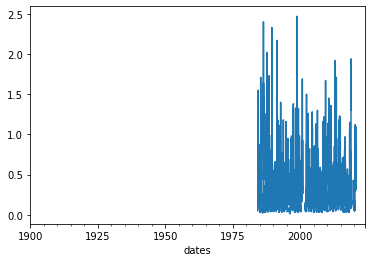

In [9]:
timeseries_EU.loc[:, "ITVEN426"].plot()

#### Boundaries areas labels:

Here we can upload our spreadsheet with the full overview of the steps made with the boundaries delineation. In the word file all the steps are fully described, and here the labels "delete", "area_error", "area_erro2" and "manual_deli" show the codes used for each step. All this pre-processing was done in QGIS.

#### At this part we need to reclassify it to the final labels we need to emply in our analysis:

0	- Fully accepted

1 - Accepted after snap

2 - Accepted after check #1	

3 - Accepted after check #2

4 - Accepted after check #3	

5 - Boundaries manually adjusted #1	

6 - Boundaries manually adjusted #2	

888	- Not accepted (karstic and canalization)

999	 - Not accepted


Full details regarding the "not accepted"  can be seen in the full overview sheet:

#### “delete”:

1 – springs

2 – Sea

3 – Canals

4 – Small streams

5 – Lake 

6 – Dam


#### “error_area”:

5 – small strems

6 – high discrepancy and num_years < 1


------------------------------------------------------------------------------------------------------------------------------
The final calculated area is called: area_calc


In [10]:
network_EU_full_overview = pd.read_excel(r"EU\network_EU_full_overview_v03.xlsx")
network_EU_full_overview.set_index("new_code", inplace = True)


# Filtering rows with both columns having the value 0 and replacing with NaN
# This line is needed because there are some gauges in DK and FR without coordinates, and that somehow the processing converted it to 0s. 
network_EU_full_overview.loc[(network_EU_full_overview['xcoord_4'] == 0) & (network_EU_full_overview['ycoord_4'] == 0), ["xcoord_4", "ycoord_4"]] = np.nan

network_EU_full_overview

code                        name           river      area  \
new_code                                                                  
ITVEN406    270VE            Adige a Albaredo           Adige   11954.0   
ITVEN407    283VE           Brenta a Barzizza          Brenta    1567.0   
ITVEN408    284VE        Adige a Boara Pisani           Adige   11954.0   
ITVEN409    285VE  Tesina a Bolzano Vicentino          Tesina     694.0   
ITVEN410    286VE    Frassine a Borgofrassine        Frassine       NaN   
...           ...                         ...             ...       ...   
BG00004   6842800                        RUSE    DANUBE RIVER  669900.0   
BG00005   6842900                    SILISTRA    DANUBE RIVER  689700.0   
BG00006   6864050                 MARINO POLE    STRUMA RIVER   10243.0   
BG00007   6864800               KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008   6865600                  SVILENGRAD   MARITSA RIVER   20857.0   

            elev        lon        lat country degimpact  lake  ...  \
new_code                                                        ...   
ITVEN406   23.59  11.266291  45.317948      IT       NaN   NaN  ...   
ITVEN407  105.38  11.730543  45.777415      IT       NaN   NaN  ...   
ITVEN408     8.4  11.784244  45.105481      IT       NaN   NaN  ...   
ITVEN409   37.57  11.620895  45.600894      IT       NaN   NaN  ...   
ITVEN410   16.69  11.481112  45.251409      IT       NaN   NaN  ...   
...          ...        ...        ...     ...       ...   ...  ...   
BG00004       12  25.950000  43.860000      BG       NaN   NaN  ...   
BG00005        7  27.260000  44.130000      BG       NaN   NaN  ...   
BG00006      NaN  23.350000  41.416668      BG       NaN   NaN  ...   
BG00007      NaN  23.869583  41.525002      BG       NaN   NaN  ...   
BG00008      NaN  26.200001  41.766666      BG       NaN   NaN  ...   

          error_area   xcoord_2   ycoord_2  new_area2  calc_Perc2  error_are2  \
new_code                                                                        
ITVEN406           0        NaN        NaN        NaN         NaN         NaN   
ITVEN407           0        NaN        NaN        NaN         NaN         NaN   
ITVEN408           0        NaN        NaN        NaN         NaN         NaN   
ITVEN409           0        NaN        NaN        NaN         NaN         NaN   
ITVEN410           0        NaN        NaN        NaN         NaN         NaN   
...              ...        ...        ...        ...         ...         ...   
BG00004            0  25.950000  43.860000        NaN         NaN         NaN   
BG00005            0  27.252961  44.121231        NaN         NaN         NaN   
BG00006            0  23.346054  41.403646        NaN         NaN         NaN   
BG00007            0  23.870271  41.525640        NaN         NaN         NaN   
BG00008            0  26.194765  41.763448        NaN         NaN         NaN   

           xcoord_3   ycoord_3  manual_del   area_calc  
new_code                                                
ITVEN406        NaN        NaN         NaN   11938.762  
ITVEN407        NaN        NaN         NaN    1571.329  
ITVEN408        NaN        NaN         NaN   12020.860  
ITVEN409        NaN        NaN         NaN     759.659  
ITVEN410        NaN        NaN         NaN     414.418  
...             ...        ...         ...         ...  
BG00004   25.950000  43.860000         NaN  660828.787  
BG00005   27.252961  44.121231         NaN  681672.362  
BG00006   23.346054  41.403646         NaN   10282.344  
BG00007   23.870271  41.525640         NaN    2244.187  
BG00008   26.194765  41.763448         NaN   20824.909  

[11605 rows x 32 columns]

Here we start the reclassify:

In [11]:
network_EU_full_overview["area_calc_label"] = np.nan

for gauge in network_EU_full_overview.index:
    # Gauges without their official area:
    if network_EU_full_overview.loc[gauge, "delete"] == 0: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 0
    
    if network_EU_full_overview.loc[gauge, "delete"] >= 1 and network_EU_full_overview.loc[gauge, "delete"] <=7: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 999
    
    if network_EU_full_overview.loc[gauge, "delete"] == 8: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 2
        
    if network_EU_full_overview.loc[gauge, "delete"] == 9: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 3
        
    if network_EU_full_overview.loc[gauge, "delete"] == 10: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 4
        
    if network_EU_full_overview.loc[gauge, "delete"] == 11: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 9
        
    if network_EU_full_overview.loc[gauge, "delete"] == 101: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 7
        
    if network_EU_full_overview.loc[gauge, "delete"] == 103: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 888
        
    # Gauges with error above 10.0% (error_area):
    if network_EU_full_overview.loc[gauge, "error_area"] >= 2 and network_EU_full_overview.loc[gauge, "error_area"] <=3: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 2
        
    if network_EU_full_overview.loc[gauge, "error_area"] == 8: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 2
        
    if network_EU_full_overview.loc[gauge, "error_area"] == 9: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 3
        
    if network_EU_full_overview.loc[gauge, "error_area"] >= 5 and network_EU_full_overview.loc[gauge, "error_area"] <=7: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 999
        
    # Gauges snapped 1 (error_are2):
    if network_EU_full_overview.loc[gauge, "error_are2"] == 0: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 1   
        
    if network_EU_full_overview.loc[gauge, "error_are2"] >= 2 and network_EU_full_overview.loc[gauge, "error_are2"] <=3: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 1 
        
    if network_EU_full_overview.loc[gauge, "error_are2"] == 7: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 999  
        
    if network_EU_full_overview.loc[gauge, "error_are2"] == 8: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 2  
        
    # Gauges snapped 2 and boundaries adjusted manually (manual_del):
    if network_EU_full_overview.loc[gauge, "manual_del"] == 1: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 1   
        
    if network_EU_full_overview.loc[gauge, "manual_del"] == 8: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 5  
        
    if network_EU_full_overview.loc[gauge, "manual_del"] == 10: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 6  
        
    if network_EU_full_overview.loc[gauge, "manual_del"] == 9: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 2  
        
    if network_EU_full_overview.loc[gauge, "manual_del"] == 7: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 999  
        
    if network_EU_full_overview.loc[gauge, "manual_del"] == 103: 
        network_EU_full_overview.loc[gauge, "area_calc_label"] = 888         

In [12]:
value_counts = network_EU_full_overview['area_calc_label'].value_counts()
value_counts

0.0      8776
999.0    1850
2.0       535
3.0       170
4.0       128
1.0        84
888.0      45
5.0        15
6.0         2
Name: area_calc_label, dtype: int64

In [13]:
value_counts = network_EU_full_overview['area_calc_label'].value_counts()
value_counts

0.0      8776
999.0    1850
2.0       535
3.0       170
4.0       128
1.0        84
888.0      45
5.0        15
6.0         2
Name: area_calc_label, dtype: int64

In [14]:
network_EU_full_overview

code                        name           river      area  \
new_code                                                                  
ITVEN406    270VE            Adige a Albaredo           Adige   11954.0   
ITVEN407    283VE           Brenta a Barzizza          Brenta    1567.0   
ITVEN408    284VE        Adige a Boara Pisani           Adige   11954.0   
ITVEN409    285VE  Tesina a Bolzano Vicentino          Tesina     694.0   
ITVEN410    286VE    Frassine a Borgofrassine        Frassine       NaN   
...           ...                         ...             ...       ...   
BG00004   6842800                        RUSE    DANUBE RIVER  669900.0   
BG00005   6842900                    SILISTRA    DANUBE RIVER  689700.0   
BG00006   6864050                 MARINO POLE    STRUMA RIVER   10243.0   
BG00007   6864800               KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008   6865600                  SVILENGRAD   MARITSA RIVER   20857.0   

            elev        lon        lat country degimpact  lake  ...  \
new_code                                                        ...   
ITVEN406   23.59  11.266291  45.317948      IT       NaN   NaN  ...   
ITVEN407  105.38  11.730543  45.777415      IT       NaN   NaN  ...   
ITVEN408     8.4  11.784244  45.105481      IT       NaN   NaN  ...   
ITVEN409   37.57  11.620895  45.600894      IT       NaN   NaN  ...   
ITVEN410   16.69  11.481112  45.251409      IT       NaN   NaN  ...   
...          ...        ...        ...     ...       ...   ...  ...   
BG00004       12  25.950000  43.860000      BG       NaN   NaN  ...   
BG00005        7  27.260000  44.130000      BG       NaN   NaN  ...   
BG00006      NaN  23.350000  41.416668      BG       NaN   NaN  ...   
BG00007      NaN  23.869583  41.525002      BG       NaN   NaN  ...   
BG00008      NaN  26.200001  41.766666      BG       NaN   NaN  ...   

           xcoord_2   ycoord_2  new_area2  calc_Perc2  error_are2   xcoord_3  \
new_code                                                                       
ITVEN406        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN407        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN408        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN409        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN410        NaN        NaN        NaN         NaN         NaN        NaN   
...             ...        ...        ...         ...         ...        ...   
BG00004   25.950000  43.860000        NaN         NaN         NaN  25.950000   
BG00005   27.252961  44.121231        NaN         NaN         NaN  27.252961   
BG00006   23.346054  41.403646        NaN         NaN         NaN  23.346054   
BG00007   23.870271  41.525640        NaN         NaN         NaN  23.870271   
BG00008   26.194765  41.763448        NaN         NaN         NaN  26.194765   

           ycoord_3  manual_del   area_calc  area_calc_label  
new_code                                                      
ITVEN406        NaN         NaN   11938.762              0.0  
ITVEN407        NaN         NaN    1571.329              0.0  
ITVEN408        NaN         NaN   12020.860              0.0  
ITVEN409        NaN         NaN     759.659              0.0  
ITVEN410        NaN         NaN     414.418              2.0  
...             ...         ...         ...              ...  
BG00004   43.860000         NaN  660828.787              0.0  
BG00005   44.121231         NaN  681672.362              0.0  
BG00006   41.403646         NaN   10282.344              0.0  
BG00007   41.525640         NaN    2244.187              0.0  
BG00008   41.763448         NaN   20824.909              0.0  

[11605 rows x 33 columns]

In [15]:
#network_EU_full_overview.to_excel(r'EU\network_EU_full_overview_v04.xlsx') 

In [16]:
pointstobeploted = network_EU_full_overview[network_EU_full_overview.area_calc_label == 999.0].loc[:, ["xcoord_4", "ycoord_4"]]
pointstobeploted


#network_EU_full_overview.loc[:, ["xcoord_4", "ycoord_4","area_calc_label"]

xcoord_4   ycoord_4
new_code                      
DK00004    9.522963  55.677436
DK00006    9.322723  55.725353
DK00007    9.310737  55.719633
DK00008    9.324104  55.721028
DK00010    9.418119  55.736845
...             ...        ...
UA00005   24.350000  50.099998
UA00006   27.307925  49.768078
TR00001   26.417917  41.192501
TR00011   30.200000  40.300000
TR00012   34.751694  39.497487

[1850 rows x 2 columns]

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

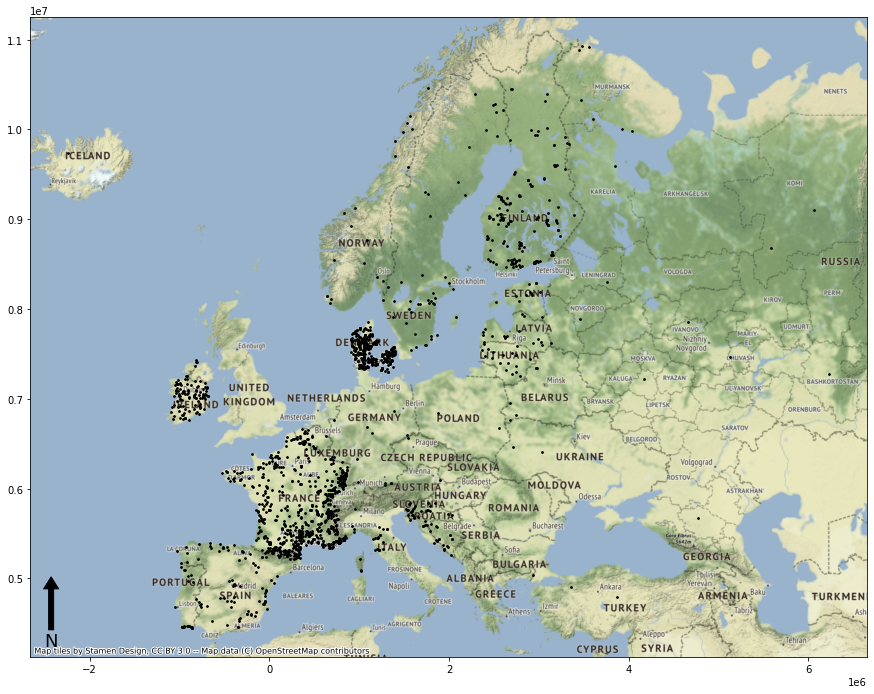

In [25]:
pointstobeploted = network_EU_full_overview[network_EU_full_overview.area_calc_label == 999.0].loc[:, ["xcoord_4", "ycoord_4"]]


geospatialfunctions.plotpointsmap(pointstobeploted, crsproj = 'epsg:4326', showcodes = False)

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

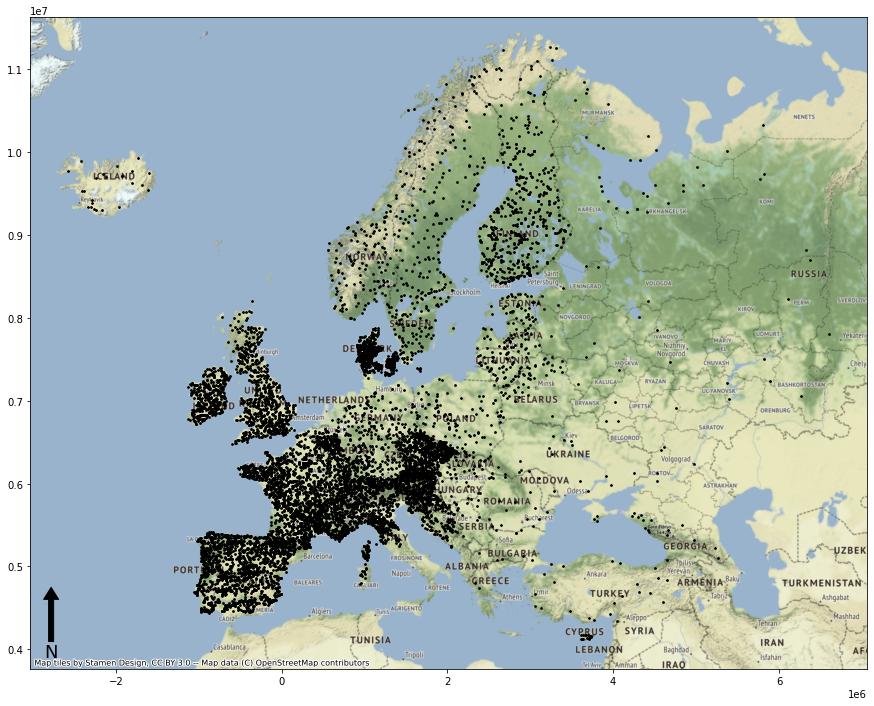

In [26]:
pointstobeploted = network_EU_full_overview[network_EU_full_overview.area_calc_label != 999.0].loc[:, ["xcoord_4", "ycoord_4"]]


geospatialfunctions.plotpointsmap(pointstobeploted, crsproj = 'epsg:4326', showcodes = False)

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

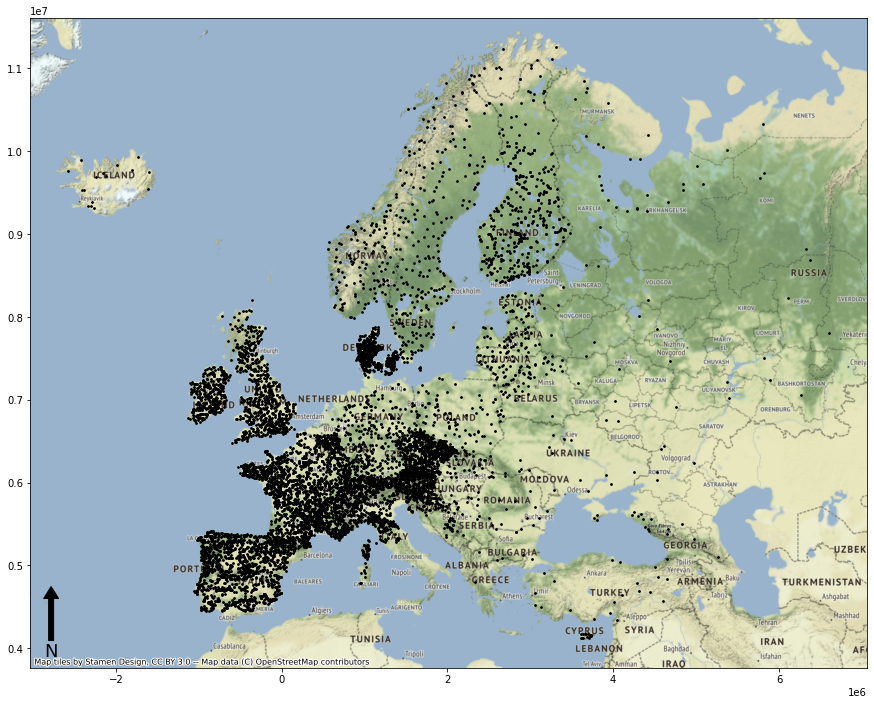

In [27]:
pointstobeploted = network_EU_full_overview[network_EU_full_overview.area_calc_label <= 1.0].loc[:, ["xcoord_4", "ycoord_4"]]


geospatialfunctions.plotpointsmap(pointstobeploted, crsproj = 'epsg:4326', showcodes = False)

In [ ]:
#network_EU.to_excel(r'EU\network_EU_withnummeasurements.xlsx') 

In [28]:
network_EU_full_overview[network_EU_full_overview.loc[:, ["xcoord_4", "ycoord_4","area_calc_label"]].area_calc_label == 999.0]

code                                               name  \
new_code                                                                
DK00004   32000005  HÃƒÆ’Ã‹Å“JEN ÃƒÆ’Ã¢â‚¬Â¦, STOKBRO OS TILLÃƒÆ’Ã...   
DK00006   32000014  NÃƒÆ’Ã‹Å“RUP BÃƒÆ’Ã¢â‚¬Â K, ÃƒÆ’Ã‹Å“.F.NÃƒÆ’Ã‹...   
DK00007   32000015  ENGELSHOLM SÃƒÆ’Ã‹Å“, TILLÃƒÆ’Ã‹Å“B E4, T.T.EN...   
DK00008   32000016  ENGELSHOLM SÃƒÆ’Ã‹Å“, TILLÃƒÆ’Ã‹Å“B E5, S.V. F...   
DK00010   32000018  GREJS ÃƒÆ’Ã¢â‚¬Â¦, AFLÃƒÆ’Ã‹Å“B FÃƒÆ’Ã¢â‚¬Â¦RU...   
...            ...                                                ...   
UA00005    6658100                                   KAMENKA BUGSKAYA   
UA00006    6679200                                           GROMOVKA   
TR00001    6665100                                         MERIC KOEP   
TR00011    6688300                        DERECIKOEREN (DERECIKVIRAN)   
TR00012    6688500                                         KALEBOGAZI   

                                           river          area elev  \
new_code                                                              
DK00004                 STOKBRO OS TILLÃƒÆ’Ã‹Å“B     15.110000  NaN   
DK00006                  ÃƒÆ’Ã‹Å“.F.NÃƒÆ’Ã‹Å“RUP      3.377327  NaN   
DK00007                         TILLÃƒÆ’Ã‹Å“B E4      1.100000  NaN   
DK00008                         TILLÃƒÆ’Ã‹Å“B E5      1.758668  NaN   
DK00010   AFLÃƒÆ’Ã‹Å“B FÃƒÆ’Ã¢â‚¬Â¦RUP SÃƒÆ’Ã‹Å“     14.456840  NaN   
...                                          ...           ...  ...   
UA00005                                      BUG   2260.000000  202   
UA00006                                    SLUCH   2480.000000  224   
TR00001                            MARITSA RIVER  27251.000000  NaN   
TR00011                            YENICE IRMAGI  13300.000000  NaN   
TR00012                               KANAK CAYI   2918.000000  964   

                lon        lat country degimpact  lake  ...   xcoord_2  \
new_code                                                ...              
DK00004    9.522963  55.677436      DK       NaN   NaN  ...   9.522963   
DK00006    9.322723  55.725353      DK       NaN   NaN  ...   9.322723   
DK00007    9.310737  55.719633      DK       NaN   NaN  ...   9.310737   
DK00008    9.324104  55.721028      DK       NaN   NaN  ...   9.324104   
DK00010    9.418119  55.736845      DK       NaN   NaN  ...   9.418119   
...             ...        ...     ...       ...   ...  ...        ...   
UA00005   24.350000  50.099998      UA       NaN   NaN  ...  24.350000   
UA00006   27.300000  49.800000      UA       NaN   NaN  ...  27.307925   
TR00001   26.417917  41.192501      TR       NaN   NaN  ...  26.417917   
TR00011   30.200000  40.300000      TR       NaN   NaN  ...  30.200000   
TR00012   34.750000  39.500000      TR       NaN   NaN  ...  34.751694   

           ycoord_2  new_area2  calc_Perc2  error_are2   xcoord_3   ycoord_3  \
new_code                                                                       
DK00004   55.677436        NaN         NaN         NaN   9.522963  55.677436   
DK00006   55.725353        NaN         NaN         NaN   9.322723  55.725353   
DK00007   55.719633        NaN         NaN         NaN   9.310737  55.719633   
DK00008   55.721028        NaN         NaN         NaN   9.324104  55.721028   
DK00010   55.736845        NaN         NaN         NaN   9.418119  55.736845   
...             ...        ...         ...         ...        ...        ...   
UA00005   50.099998        NaN         NaN         NaN  24.350000  50.099998   
UA00006   49.768078        NaN         NaN         NaN  27.307925  49.768078   
TR00001   41.192501        NaN         NaN         NaN  26.417917  41.192501   
TR00011   40.300000        NaN         NaN         NaN  30.200000  40.300000   
TR00012   39.497487     6130.0     110.075         7.0  34.751694  39.497487   

          manual_del  area_calc  area_calc_label  
new_code                                          
DK00004          NaN     16.955   

In [23]:
network_EU_full_overview[network_EU_full_overview.loc[:, ["xcoord_4", "ycoord_4","area_calc_label"]].area_calc_label == 999.0]

Field1      code                                               name  \
new_code                                                                        
DK00004        3  32000005               HÃƒËœJEN Ãƒâ€¦, STOKBRO OS TILLÃƒËœB   
DK00006        5  32000014                  NÃƒËœRUP BÃƒâ€ K, ÃƒËœ.F.NÃƒËœRUP   
DK00007        6  32000015  ENGELSHOLM SÃƒËœ, TILLÃƒËœB E4, T.T.ENGELSHOLM...   
DK00008        7  32000016  ENGELSHOLM SÃƒËœ, TILLÃƒËœB E5, S.V. FOR SÃƒËœ...   
DK00010        9  32000018              GREJS Ãƒâ€¦, AFLÃƒËœB FÃƒâ€¦RUP SÃƒËœ   
...          ...       ...                                                ...   
UA00005        4   6658100                                   KAMENKA BUGSKAYA   
UA00006        5   6679200                                           GROMOVKA   
TR00001        0   6665100                                         MERIC KOEP   
TR00011       10   6688300                        DERECIKOEREN (DERECIKVIRAN)   
TR00012       11   6688500                                         KALEBOGAZI   

                             river          area elev        lon        lat  \
new_code                                                                      
DK00004       STOKBRO OS TILLÃƒËœB     15.110000  NaN   9.522963  55.677436   
DK00006            ÃƒËœ.F.NÃƒËœRUP      3.377327  NaN   9.322723  55.725353   
DK00007               TILLÃƒËœB E4      1.100000  NaN   9.310737  55.719633   
DK00008               TILLÃƒËœB E5      1.758668  NaN   9.324104  55.721028   
DK00010   AFLÃƒËœB FÃƒâ€¦RUP SÃƒËœ     14.456840  NaN   9.418119  55.736845   
...                            ...           ...  ...        ...        ...   
UA00005                        BUG   2260.000000  202  24.350000  50.099998   
UA00006                      SLUCH   2480.000000  224  27.300000  49.800000   
TR00001              MARITSA RIVER  27251.000000  NaN  26.417917  41.192501   
TR00011              YENICE IRMAGI  13300.000000  NaN  30.200000  40.300000   
TR00012                 KANAK CAYI   2918.000000  964  34.750000  39.500000   

         country degimpact  ...  new_area2  calc_Perc2 error_are2   xcoord_3  \
new_code                    ...                                                
DK00004       DK       NaN  ...        NaN         NaN        NaN   9.522963   
DK00006       DK       NaN  ...        NaN         NaN        NaN   9.322723   
DK00007       DK       NaN  ...        NaN         NaN        NaN   9.310737   
DK00008       DK       NaN  ...        NaN         NaN        NaN   9.324104   
DK00010       DK       NaN  ...        NaN         NaN        NaN   9.418119   
...          ...       ...  ...        ...         ...        ...        ...   
UA00005       UA       NaN  ...        NaN         NaN        NaN  24.350000   
UA00006       UA       NaN  ...        NaN         NaN        NaN  27.307925   
TR00001       TR       NaN  ...        NaN         NaN        NaN  26.417917   
TR00011       TR       NaN  ...        NaN         NaN        NaN  30.200000   
TR00012       TR       NaN  ...     6130.0     110.075        7.0  34.751694   

           ycoord_3 manual_del   xcoord_4   ycoord_4  area_calc  \
new_code                                                          
DK00004   55.677436        NaN   9.522963  55.677436     16.955   
DK00006   55.725353        NaN   9.322723  55.725353      4.115   
DK00007   55.719633        NaN   9.310737  55.719633      2.472   
DK00008   55.721028        NaN   9.324104  55.721028      4.091   
DK00010   55.736845        NaN   9.418119  55.736845     12.727   
...             ...        ...        ...        ...        ...   
UA00005   50.099998        NaN  24.350000  50.099998    136.897   
UA00006   49.768078        NaN  27.307925  49.768078   1377.320   
TR00001   41.192501        NaN  26.417917  41.192501      2.464   
TR00011   40.300000        NaN  30.200000  40.300000     13.730   
TR00012   39.497487        NaN  34.751694  39.497487   6128.701   

          area_

In [25]:
network_EU_full_overview.loc[:, ["xcoord_4", "ycoord_4","area_calc_label"]].dtypes

xcoord_4           float64
ycoord_4           float64
area_calc_label    float64
dtype: object

Here we can check the number of stations per year:

In [221]:
timeseries_EU_y = timeseries_EU.resample('Y').count() # First we count the number of days with non NaN values

timeseries_EU_y

AT00001  AT00002  AT00003  AT00004  AT00005  AT00006  AT00007  \
dates                                                                       
1900-12-31        0        0        0        0        0        0        0   
1901-12-31        0        0        0        0        0        0        0   
1902-12-31        0        0        0        0        0        0        0   
1903-12-31        0        0        0        0        0        0        0   
1904-12-31        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      365      365      365      365      365      365      365   
2020-12-31        0        0        0        0        0        0        0   
2021-12-31        0        0        0        0        0        0        0   
2022-12-31        0        0        0        0        0        0        0   
2023-12-31        0        0        0        0        0        0        0   

            AT00008  AT00009  AT00010  ...  TR00027  TR00028  BG00001  \
dates                                  ...                              
1900-12-31        0        0        0  ...        0        0        0   
1901-12-31        0        0        0  ...        0        0        0   
1902-12-31        0        0        0  ...        0        0        0   
1903-12-31        0        0        0  ...        0        0        0   
1904-12-31        0        0        0  ...        0        0        0   
...             ...      ...      ...  ...      ...      ...      ...   
2019-12-31      365      365      365  ...        0        0        0   
2020-12-31        0        0        0  ...        0        0        0   
2021-12-31        0        0        0  ...        0        0        0   
2022-12-31        0        0        0  ...        0        0        0   
2023-12-31        0        0        0  ...        0        0        0   

            BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  BG00008  
dates                                                                      
1900-12-31        0        0        0        0        0        0        0  
1901-12-31        0        0        0        0        0        0        0  
1902-12-31        0        0        0        0        0        0        0  
1903-12-31        0        0        0        0        0        0        0  
1904-12-31        0        0        0        0        0        0        0  
...             ...      ...      ...      ...      ...      ...      ...  
2019-12-31        0        0        0        0        0        0        0  
2020-12-31        0        0        0        0        0        0        0  
2021-12-31        0        0        0        0        0        0        0  
2022-12-31        0        0        0        0        0        0        0  
2023-12-31        0        0        0        0        0        0        0  

[124 rows x 11605 columns]

In [222]:
timeseries_EU_y

AT00001  AT00002  AT00003  AT00004  AT00005  AT00006  AT00007  \
dates                                                                       
1900-12-31        0        0        0        0        0        0        0   
1901-12-31        0        0        0        0        0        0        0   
1902-12-31        0        0        0        0        0        0        0   
1903-12-31        0        0        0        0        0        0        0   
1904-12-31        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      365      365      365      365      365      365      365   
2020-12-31        0        0        0        0        0        0        0   
2021-12-31        0        0        0        0        0        0        0   
2022-12-31        0        0        0        0        0        0        0   
2023-12-31        0        0        0        0        0        0        0   

            AT00008  AT00009  AT00010  ...  TR00027  TR00028  BG00001  \
dates                                  ...                              
1900-12-31        0        0        0  ...        0        0        0   
1901-12-31        0        0        0  ...        0        0        0   
1902-12-31        0        0        0  ...        0        0        0   
1903-12-31        0        0        0  ...        0        0        0   
1904-12-31        0        0        0  ...        0        0        0   
...             ...      ...      ...  ...      ...      ...      ...   
2019-12-31      365      365      365  ...        0        0        0   
2020-12-31        0        0        0  ...        0        0        0   
2021-12-31        0        0        0  ...        0        0        0   
2022-12-31        0        0        0  ...        0        0        0   
2023-12-31        0        0        0  ...        0        0        0   

            BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  BG00008  
dates                                                                      
1900-12-31        0        0        0        0        0        0        0  
1901-12-31        0        0        0        0        0        0        0  
1902-12-31        0        0        0        0        0        0        0  
1903-12-31        0        0        0        0        0        0        0  
1904-12-31        0        0        0        0        0        0        0  
...             ...      ...      ...      ...      ...      ...      ...  
2019-12-31        0        0        0        0        0        0        0  
2020-12-31        0        0        0        0        0        0        0  
2021-12-31        0        0        0        0        0        0        0  
2022-12-31        0        0        0        0        0        0        0  
2023-12-31        0        0        0        0        0        0        0  

[124 rows x 11605 columns]

In [205]:
summary_per_year = pd.DataFrame()
summary_per_year["less_than_0percent"] = (timeseries_EU_y.T >= 365).sum()
summary_per_year["less_than_1percent"] = (timeseries_EU_y.T > 360).sum()
summary_per_year["less_than_10percent"] = (timeseries_EU_y.T > 328).sum()
summary_per_year["less_than_25percent"] = (timeseries_EU_y.T > 273).sum()
summary_per_year["less_than_50percent"] = (timeseries_EU_y.T > 182).sum()
summary_per_year["less_than_100percent"] = (timeseries_EU_y.T > 0).sum()
summary_per_year

less_than_0percent  less_than_1percent  less_than_10percent  \
dates                                                                     
1900-12-31                  14                  14                   14   
1901-12-31                  18                  18                   18   
1902-12-31                  19                  19                   19   
1903-12-31                  19                  20                   20   
1904-12-31                  21                  21                   21   
...                        ...                 ...                  ...   
2019-12-31                5373                5532                 5745   
2020-12-31                4742                4833                 5012   
2021-12-31                3621                3769                 3944   
2022-12-31                1315                1392                 1489   
2023-12-31                   0                   0                    0   

            less_than_25percent  less_than_50percent  less_than_100percent  
dates                                                                       
1900-12-31                   14                   15                    15  
1901-12-31                   18                   19                    19  
1902-12-31                   19                   19                    20  
1903-12-31                   20                   20                    20  
1904-12-31                   21                   21                    21  
...                         ...                  ...                   ...  
2019-12-31                 5856                 6817                  7114  
2020-12-31                 5131                 5214                  5355  
2021-12-31                 4143                 4947                  5105  
2022-12-31                 1535                 3005                  3194  
2023-12-31                    0                    0                   640  

[124 rows x 6 columns]

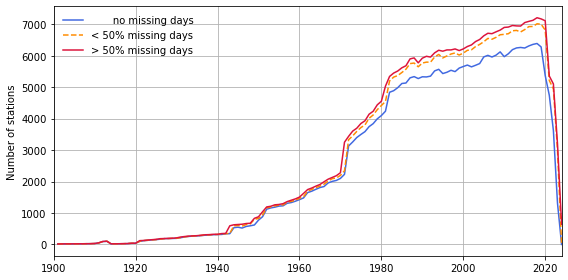

In [209]:
plt.figure(figsize=(8, 4))

# Add the line to the plot
plt.plot(summary_per_year.less_than_0percent, color = "royalblue")
plt.plot(summary_per_year.less_than_50percent, color = "darkorange", linestyle='--')
plt.plot(summary_per_year.less_than_100percent, color = "crimson")

start_date = pd.Timestamp('1900')
end_date = pd.Timestamp('2024')
plt.xlim(start_date, end_date)
plt.grid(True)
plt.legend(["       no missing days", "< 50% missing days", "> 50% missing days"], loc='upper left', frameon = False)

# Set labels and title
#plt.xlabel('')
plt.ylabel('Number of stations')
plt.tight_layout()  # Adjust the positions of the axes to prevent overlapping elements

#plt.savefig('plot1.jpeg', dpi=300)

#plt.show()

In [226]:
idcondition = network_EU_full_overview[network_EU_full_overview.loc[:, ["xcoord_4", "ycoord_4","area_calc_label"]].area_calc_label == 1.0].index

In [223]:
timeseries_EU_yearly = timeseries_EU.resample('Y').agg(lambda x: np.nan if np.isnan(x).any() else np.mean(x))
timeseries_EU_yearly

AT00001   AT00002   AT00003   AT00004  AT00005   AT00006  \
dates                                                                     
1900-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1901-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1902-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1903-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1904-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
...                ...       ...       ...       ...      ...       ...   
2019-12-31  185.494247  4.952027  6.750137  4.684055  3.33474  6.740164   
2020-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2021-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2022-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2023-12-31         NaN       NaN       NaN       NaN      NaN       NaN   

              AT00007   AT00008    AT00009   AT00010  ...  TR00027  TR00028  \
dates                                                 ...                     
1900-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1901-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1902-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1903-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1904-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
...               ...       ...        ...       ...  ...      ...      ...   
2019-12-31  29.919973  2.020614  73.909041  1.944904  ...      NaN      NaN   
2020-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2021-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2022-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2023-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   

            BG00001  BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  \
dates                                                                       
1900-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1901-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1902-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1903-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1904-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            BG00008  
dates                
1900-12-31      NaN  
1901-12-31      NaN  
1902-12-31      NaN  
1903-12-31      NaN  
1904-12-31      NaN  
...             ...  
2019-12-31      NaN  
2020-12-31      NaN  
2021-12-31      NaN  
2022-12-31      NaN  
2023-12-31      NaN  

[124 rows x 11605 columns]

In [233]:
timeseries_EU_yearly

AT00001   AT00002   AT00003   AT00004  AT00005   AT00006  \
dates                                                                     
1900-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1901-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1902-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1903-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
1904-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
...                ...       ...       ...       ...      ...       ...   
2019-12-31  185.494247  4.952027  6.750137  4.684055  3.33474  6.740164   
2020-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2021-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2022-12-31         NaN       NaN       NaN       NaN      NaN       NaN   
2023-12-31         NaN       NaN       NaN       NaN      NaN       NaN   

              AT00007   AT00008    AT00009   AT00010  ...  TR00027  TR00028  \
dates                                                 ...                     
1900-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1901-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1902-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1903-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
1904-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
...               ...       ...        ...       ...  ...      ...      ...   
2019-12-31  29.919973  2.020614  73.909041  1.944904  ...      NaN      NaN   
2020-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2021-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2022-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   
2023-12-31        NaN       NaN        NaN       NaN  ...      NaN      NaN   

            BG00001  BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  \
dates                                                                       
1900-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1901-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1902-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1903-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1904-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            BG00008  
dates                
1900-12-31      NaN  
1901-12-31      NaN  
1902-12-31      NaN  
1903-12-31      NaN  
1904-12-31      NaN  
...             ...  
2019-12-31      NaN  
2020-12-31      NaN  
2021-12-31      NaN  
2022-12-31      NaN  
2023-12-31      NaN  

[124 rows x 11605 columns]

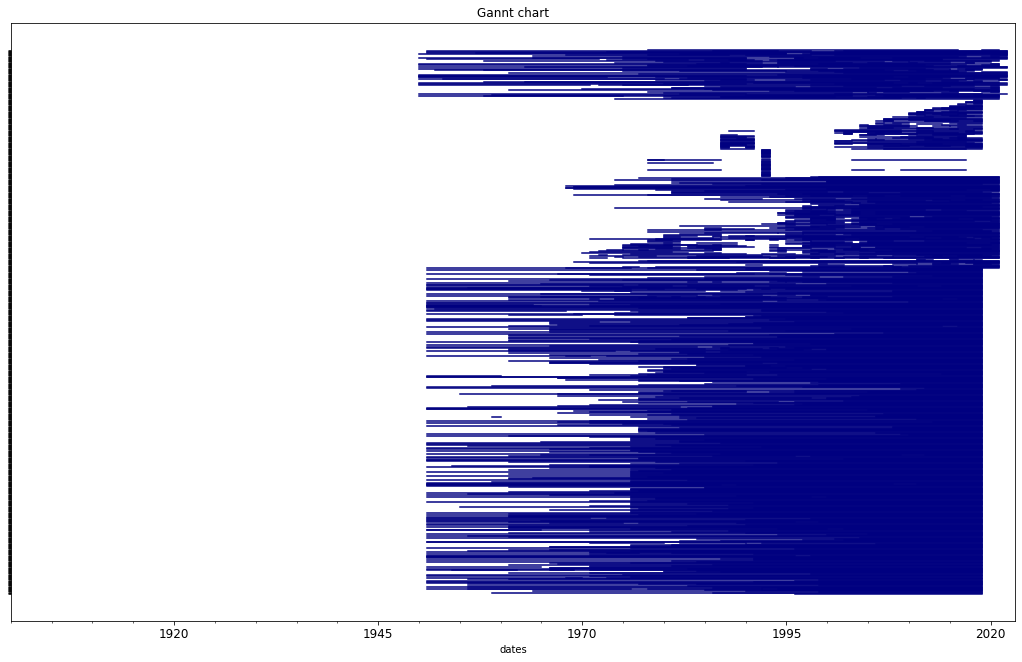

In [229]:
figplot, axesplot = geospatialfunctions.plotganntchart(timeseriesfinal_gantt = timeseries_EU_yearly.iloc[:, 0:1000], 
                                                       
                                                       figsize_chart = (18, 11), showcodes = False,
                                                       color_chart = "navy", fontsize_chart = 12,facecolor_chart = "white", 
                                                       title_chart = "Gannt chart")

In [240]:
countries = list(network_EU_full_overview.country.unique())
len(countries)

39

In [232]:
summarygapsstations_filter1 = network_EU_full_overview[network_EU_full_overview['country'].isin(countries[0:10])]
summarygapsstations_filter1

code                        name         river     area  \
new_code                                                                   
ITVEN406        270VE            Adige a Albaredo         Adige  11954.0   
ITVEN407        283VE           Brenta a Barzizza        Brenta   1567.0   
ITVEN408        284VE        Adige a Boara Pisani         Adige  11954.0   
ITVEN409        285VE  Tesina a Bolzano Vicentino        Tesina    694.0   
ITVEN410        286VE    Frassine a Borgofrassine      Frassine      NaN   
...               ...                         ...           ...      ...   
ITTOS401  TOS10005700               Casamallecchi         Merse      NaN   
ITTOS402  TOS10005710                      Ornate         Merse    483.0   
ITTOS403  TOS10005720          Ponte di Torniella         Farma     70.0   
ITTOS404  TOS10005760          Monte Amiata Scalo    Ombrone GR    580.0   
ITTOS405  TOS10005950                S. Mamiliano  Rio Bovalico      6.7   

            elev        lon        lat country degimpact  lake  ...  \
new_code                                                        ...   
ITVEN406   23.59  11.266291  45.317948      IT       NaN   NaN  ...   
ITVEN407  105.38  11.730543  45.777415      IT       NaN   NaN  ...   
ITVEN408     8.4  11.784244  45.105481      IT       NaN   NaN  ...   
ITVEN409   37.57  11.620895  45.600894      IT       NaN   NaN  ...   
ITVEN410   16.69  11.481112  45.251409      IT       NaN   NaN  ...   
...          ...        ...        ...     ...       ...   ...  ...   
ITTOS401     NaN  11.000000  43.000000      IT       NaN   NaN  ...   
ITTOS402     NaN  11.000000  43.000000      IT       NaN   NaN  ...   
ITTOS403     NaN  11.154131  43.073982      IT       NaN   NaN  ...   
ITTOS404     160  11.392822  43.069893      IT       NaN   NaN  ...   
ITTOS405     NaN  10.234461  42.750384      IT       NaN   NaN  ...   

           xcoord_2   ycoord_2  new_area2  calc_Perc2  error_are2   xcoord_3  \
new_code                                                                       
ITVEN406        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN407        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN408        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN409        NaN        NaN        NaN         NaN         NaN        NaN   
ITVEN410        NaN        NaN        NaN         NaN         NaN        NaN   
...             ...        ...        ...         ...         ...        ...   
ITTOS401  11.000000  43.000000        NaN         NaN         7.0  11.000000   
ITTOS402  11.000000  43.000000        NaN         NaN         7.0  11.000000   
ITTOS403  11.154131  43.073982        NaN         NaN         NaN  11.154131   
ITTOS404  11.366445  43.082445      961.0       65.69         7.0  11.366445   
ITTOS405  10.234461  42.750384        NaN         NaN         NaN  10.234461   

           ycoord_3  manual_del  area_calc  area_calc_label  
new_code                                                     
ITVEN406        NaN         NaN  11938.762              0.0  
ITVEN407        NaN         NaN   1571.329              0.0  
ITVEN408        NaN         NaN  12020.860              0.0  
ITVEN409        NaN         NaN    759.659              0.0  
ITVEN410        NaN         NaN    414.418              2.0  
...             ...         ...        ...              ...  
ITTOS401  43.000000         NaN    122.672            999.0  
ITTOS402  43.000000         NaN    122.672            999.0  
ITTOS403  43.073982         NaN     70.694              0.0  
ITTOS404  43.082445         NaN    960.826            999.0  
ITTOS405  42.750384         NaN      6.637              0.0  

[3122 rows x 33 columns]

In [234]:
timeseries_EU_filter1 = timeseries_EU_yearly.loc[:, summarygapsstations_filter1.index.tolist()]
timeseries_EU_filter1

ITVEN406   ITVEN407    ITVEN408  ITVEN409  ITVEN410  ITVEN411  \
dates                                                                         
1900-12-31         NaN        NaN         NaN       NaN       NaN       NaN   
1901-12-31         NaN        NaN         NaN       NaN       NaN       NaN   
1902-12-31         NaN        NaN         NaN       NaN       NaN       NaN   
1903-12-31         NaN        NaN         NaN       NaN       NaN       NaN   
1904-12-31         NaN        NaN         NaN       NaN       NaN       NaN   
...                ...        ...         ...       ...       ...       ...   
2019-12-31  222.428466  83.094356         NaN  9.714356  9.248685  2.170904   
2020-12-31  244.419617        NaN  250.107650       NaN  8.038798  2.385164   
2021-12-31  217.564493  68.563616  223.037726  4.962658       NaN  2.042274   
2022-12-31  108.394548  29.968712  106.994932  0.394055       NaN  0.808822   
2023-12-31         NaN        NaN         NaN       NaN       NaN       NaN   

            ITVEN412  ITVEN413    ITVEN414   ITVEN415  ...  ITTOS396  \
dates                                                  ...             
1900-12-31       NaN       NaN         NaN        NaN  ...       NaN   
1901-12-31       NaN       NaN         NaN        NaN  ...       NaN   
1902-12-31       NaN       NaN         NaN        NaN  ...       NaN   
1903-12-31       NaN       NaN         NaN        NaN  ...       NaN   
1904-12-31       NaN       NaN         NaN        NaN  ...       NaN   
...              ...       ...         ...        ...  ...       ...   
2019-12-31  4.512137  5.626959  104.204110  32.383973  ...       NaN   
2020-12-31       NaN       NaN  102.511093        NaN  ...       NaN   
2021-12-31  3.265808       NaN  102.858603  24.552055  ...       NaN   
2022-12-31  1.522767       NaN   45.615425        NaN  ...       NaN   
2023-12-31       NaN       NaN         NaN        NaN  ...       NaN   

            ITTOS397  ITTOS398  ITTOS399  ITTOS400  ITTOS401  ITTOS402  \
dates                                                                    
1900-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1901-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1902-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1903-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
1904-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2019-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2021-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2022-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2023-12-31       NaN       NaN       NaN       NaN       NaN       NaN   

            ITTOS403  ITTOS404  ITTOS405  
dates                                     
1900-12-31       NaN       NaN       NaN  
1901-12-31       NaN       NaN       NaN  
1902-12-31       NaN       NaN       NaN  
1903-12-31       NaN       NaN       NaN  
1904-12-31       NaN       NaN       NaN  
...              ...       ...       ...  
2019-12-31       NaN       NaN       NaN  
2020-12-31       NaN       NaN       NaN  
2021-12-31       NaN       NaN       NaN  
2022-12-31       NaN       NaN       NaN  
2023-12-31       NaN       NaN       NaN  

[124 rows x 3122 columns]

In [243]:
summarygapsstations_filter2 = network_EU_full_overview[network_EU_full_overview['country'].isin(countries[10:20])]
summarygapsstations_filter2

code                                               name  \
new_code                                                               
FI00001   5902650             NuasjÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤rvi, Koivukoski   
FI00002   5902700                NuasjÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤rvi - luusua   
FI00003   6000110          Iso PuutiojÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤rvi - luusua   
FI00004   6100614  NÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤ljÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤nkÃƒÆ’Ã...   
FI00005   6100620               SuolijÃƒÆ’Ã†â€™Ãƒâ€šÃ‚Â¤rvi - luusua   
...           ...                                                ...   
LT00072   6574723                                      VOKE-ZAGARINE   
LT00073   6574725                                           ZAGARINE   
LT00074   6574727                                           ZERVYNOS   
LT00075   6574811                                         ZINDAICIAI   
LT00076   6574813                                         ANTKALNIAI   

                  river    area    elev        lon        lat country  \
new_code                                                                
FI00001        Oulujoki  7475.0     NaN  27.736529  64.226285      FI   
FI00002        Oulujoki  7475.0     NaN  27.736529  64.226285      FI   
FI00003   Kiiminginjoki   371.0     NaN  27.595146  64.865324      FI   
FI00004          Iijoki   280.0     NaN  28.340834  65.037027      FI   
FI00005          Iijoki  1313.0     NaN  28.069000  65.144550      FI   
...                 ...     ...     ...        ...        ...     ...   
LT00072          MERKYS   435.0   130.4  25.109400  54.448400      LT   
LT00073          MERKYS   429.0  130.69  25.103600  54.448200      LT   
LT00074             ULA   679.0  103.92  24.500000  54.116667      LT   
LT00075          MITUVA   402.0   25.06  22.692300  55.173600      LT   
LT00076          PEDAME     NaN     NaN  22.666667  55.133333      LT   

         degimpact  lake  ...   xcoord_2   ycoord_2  new_area2  calc_Perc2  \
new_code                  ...                                                
FI00001        NaN  11.7  ...  27.736529  64.226285        NaN         NaN   
FI00002        NaN  11.7  ...  27.736529  64.226285        NaN         NaN   
FI00003        NaN   4.6  ...  27.595146  64.865324        NaN         NaN   
FI00004        NaN   3.7  ...  28.340834  65.037027        NaN         NaN   
FI00005        NaN   3.9  ...  28.069000  65.144550        NaN         NaN   
...            ...   ...  ...        ...        ...        ...         ...   
LT00072        NaN   NaN  ...  25.109400  54.448400        NaN         NaN   
LT00073        NaN   NaN  ...  25.103600  54.448200        NaN         NaN   
LT00074        NaN   NaN  ...  24.500000  54.116667        NaN         NaN   
LT00075        NaN   NaN  ...  22.692300  55.173600        NaN         NaN   
LT00076        NaN   NaN  ...  22.666667  55.133333        NaN         NaN   

          error_are2   xcoord_3   ycoord_3  manual_del  area_calc  \
new_code                                                            
FI00001          NaN  27.736529  64.226285         NaN   7474.331   
FI00002          NaN  27.736529  64.226285         NaN   7474.331   
FI00003          NaN  27.595146  64.865324         NaN    406.503   
FI00004          NaN  28.340834  65.037027         NaN    278.565   
FI00005          NaN  28.069000  65.144550         NaN   1318.330   
...              ...        ...        ...         ...        ...   
LT00072          NaN  25.109400  54.448400         NaN      3.689   
LT00073          NaN  25.103600  54.448200         NaN    447.002   
LT00074          NaN  24.500000  54.116667         NaN    615.079   
LT00075          NaN  22.692300  55.173600         NaN    367.999   
LT00076          NaN  22.666667  55.133333         NaN    627.453   

          area_calc_label  
new_code                   
FI00001               0.0  
FI00002               0.0  
FI00003               0.0  
FI00004               0.0  
FI00005               0.0  
...              

In [244]:
timeseries_EU_filter2 = timeseries_EU_yearly.loc[:, summarygapsstations_filter2.index.tolist()]
timeseries_EU_filter2

FI00001    FI00002   FI00003  FI00004    FI00005    FI00006  \
dates                                                                        
1900-12-31         NaN  94.156164       NaN      NaN        NaN        NaN   
1901-12-31         NaN  60.509589       NaN      NaN        NaN        NaN   
1902-12-31         NaN  88.306849       NaN      NaN        NaN        NaN   
1903-12-31         NaN  91.024658       NaN      NaN        NaN        NaN   
1904-12-31         NaN  86.754098       NaN      NaN        NaN        NaN   
...                ...        ...       ...      ...        ...        ...   
2019-12-31   78.861233        NaN  3.515699      NaN  16.905041  38.562192   
2020-12-31  120.379672        NaN       NaN      NaN  27.717022  51.509918   
2021-12-31  100.958740        NaN       NaN      NaN  22.406027  45.045096   
2022-12-31   85.721589        NaN  4.033014      NaN  16.129096  28.594712   
2023-12-31         NaN        NaN       NaN      NaN        NaN        NaN   

            FI00007    FI00008   FI00009    FI00010  ...  LT00067  LT00068  \
dates                                                ...                     
1900-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   
1901-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   
1902-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   
1903-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   
1904-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   
...             ...        ...       ...        ...  ...      ...      ...   
2019-12-31      NaN  42.515973  4.394932  50.410712  ...      NaN      NaN   
2020-12-31      NaN  58.116202       NaN  68.453306  ...      NaN      NaN   
2021-12-31      NaN  48.122740       NaN  48.348767  ...      NaN      NaN   
2022-12-31      NaN  34.407945  5.310219        NaN  ...      NaN      NaN   
2023-12-31      NaN        NaN       NaN        NaN  ...      NaN      NaN   

            LT00069  LT00070  LT00071  LT00072  LT00073  LT00074  LT00075  \
dates                                                                       
1900-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1901-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1902-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1903-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1904-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            LT00076  
dates                
1900-12-31      NaN  
1901-12-31      NaN  
1902-12-31      NaN  
1903-12-31      NaN  
1904-12-31      NaN  
...             ...  
2019-12-31      NaN  
2020-12-31      NaN  
2021-12-31      NaN  
2022-12-31      NaN  
2023-12-31      NaN  

[124 rows x 5480 columns]

In [247]:
summarygapsstations_filter3 = network_EU_full_overview[network_EU_full_overview['country'].isin(countries[20:30])]
summarygapsstations_filter3

code            name   river    area elev        lon        lat  \
new_code                                                                       
LU00001        17      Bigonville    Sure   308.4  NaN   5.801399  49.869821   
LU00002        10          Bissen  Attert   291.5  NaN   6.056414  49.784853   
LU00003        15      Bollendorf    Sure  3227.0  NaN   6.359193  49.850919   
LU00004        35        Clervaux  Clerve   147.2  NaN   6.027574  50.054520   
LU00005        13        Dasbourg     Our   450.4  NaN   6.126077  50.049832   
...           ...             ...     ...     ...  ...        ...        ...   
SK00017   6144350  KOSICKE OLSANY  TORYSA  1298.0  186  21.336540  48.732600   
SK00018   6144400       HANUSOVCE   TOPLA  1050.0  NaN  21.500000  49.033333   
SK00019   6144490         UDAVSKE   UDAVA   211.0  NaN  21.966667  48.983334   
SK00020   6144500        ADIDOVCE   UDAVA   176.0  202  22.049999  49.016666   
SK00021   6158100       CHMELNICA  POPRAD  1262.0  507  20.730230  49.289180   

         country degimpact  lake  ...   xcoord_2   ycoord_2  new_area2  \
new_code                          ...                                    
LU00001       LU       NaN   NaN  ...   5.801399  49.869821        NaN   
LU00002       LU       NaN   NaN  ...   6.056414  49.784853        NaN   
LU00003       LU       NaN   NaN  ...   6.359193  49.850919        NaN   
LU00004       LU       NaN   NaN  ...   6.027574  50.054520        NaN   
LU00005       LU       NaN   NaN  ...   6.126077  50.049832        NaN   
...          ...       ...   ...  ...        ...        ...        ...   
SK00017       SK       NaN   NaN  ...  21.336540  48.732600        NaN   
SK00018       SK       NaN   NaN  ...  21.508220  49.036788        NaN   
SK00019       SK       NaN   NaN  ...  21.966124  48.971090        NaN   
SK00020       SK       NaN   NaN  ...  22.042608  49.018813        NaN   
SK00021       SK       NaN   NaN  ...  20.730230  49.289180        NaN   

          calc_Perc2  error_are2   xcoord_3   ycoord_3  manual_del  area_calc  \
new_code                                                                        
LU00001          NaN         NaN   5.801399  49.869821         NaN    308.476   
LU00002          NaN         NaN   6.056414  49.784853         NaN    291.757   
LU00003          NaN         NaN   6.359193  49.850919         NaN   3250.149   
LU00004          NaN         NaN   6.027574  50.054520         NaN    147.600   
LU00005          NaN         NaN   6.126077  50.049832         NaN    449.318   
...              ...         ...        ...        ...         ...        ...   
SK00017          NaN         NaN  21.336540  48.732600         NaN   1301.123   
SK00018          NaN         NaN  21.508220  49.036788         NaN   1001.758   
SK00019          NaN         NaN  21.966124  48.971090         NaN    219.280   
SK00020          NaN         NaN  22.042608  49.018813         NaN    182.303   
SK00021          NaN         NaN  20.730230  49.289180         NaN   1266.388   

          area_calc_label  
new_code                   
LU00001               0.0  
LU00002               0.0  
LU00003               0.0  
LU00004               0.0  
LU00005               0.0  
...                   ...  
SK00017               0.0  
SK00018               0.0  
SK00019               0.0  
SK00020               0.0  
SK00021               0.0  

[798 rows x 33 columns]

In [248]:
timeseries_EU_filter3 = timeseries_EU_yearly.loc[:, summarygapsstations_filter3.index.tolist()]
timeseries_EU_filter3

LU00001   LU00002    LU00003   LU00004   LU00005    LU00006  \
dates                                                                      
1900-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
1901-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
1902-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
1903-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
1904-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
...              ...       ...        ...       ...       ...        ...   
2019-12-31  5.513696  3.885408  38.247838  1.962690  6.772162  27.179532   
2020-12-31  5.354213  4.383093  40.498410  1.952672  6.322620  28.760536   
2021-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
2022-12-31       NaN       NaN        NaN       NaN       NaN        NaN   
2023-12-31       NaN       NaN        NaN       NaN       NaN        NaN   

              LU00007   LU00008   LU00009   LU00010  ...  SK00012  SK00013  \
dates                                                ...                     
1900-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
1901-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
1902-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
1903-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
1904-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
...               ...       ...       ...       ...  ...      ...      ...   
2019-12-31  12.583803  6.695822  3.050175  1.730814  ...      NaN      NaN   
2020-12-31  13.958705  6.443943  3.198536  1.921213  ...      NaN      NaN   
2021-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
2022-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   
2023-12-31        NaN       NaN       NaN       NaN  ...      NaN      NaN   

            SK00014  SK00015  SK00016  SK00017  SK00018  SK00019  SK00020  \
dates                                                                       
1900-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1901-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1902-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1903-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1904-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            SK00021  
dates                
1900-12-31      NaN  
1901-12-31      NaN  
1902-12-31      NaN  
1903-12-31      NaN  
1904-12-31      NaN  
...             ...  
2019-12-31      NaN  
2020-12-31      NaN  
2021-12-31      NaN  
2022-12-31      NaN  
2023-12-31      NaN  

[124 rows x 798 columns]

In [253]:
summarygapsstations_filter4 = network_EU_full_overview[network_EU_full_overview['country'].isin(countries[30:40])]
summarygapsstations_filter4

code            name                     river       area  \
new_code                                                                 
SI00001      1060  Gornja Radgona                      Mura   10197.00   
SI00002      1070        Petanjci                      Mura   10391.44   
SI00003      1100         Cankova           KuÃƒâ€žÃ‚Ânica      30.40   
SI00004      1140        Pristava  Ãƒâ€¦Ã‚Â Ãƒâ€žÃ‚Âavnica     272.54   
SI00005      1165         Nuskova                    Ledava      50.61   
...           ...             ...                       ...        ...   
BG00004   6842800            RUSE              DANUBE RIVER  669900.00   
BG00005   6842900        SILISTRA              DANUBE RIVER  689700.00   
BG00006   6864050     MARINO POLE              STRUMA RIVER   10243.00   
BG00007   6864800   KHADZHIDIMOVO            NESTOS POTAMOS    2260.00   
BG00008   6865600      SVILENGRAD             MARITSA RIVER   20857.00   

             elev        lon        lat country degimpact  lake  ...  \
new_code                                                         ...   
SI00001   202.338  16.000253  46.681510      SI       NaN   NaN  ...   
SI00002   193.763  16.059244  46.648821      SI       NaN   NaN  ...   
SI00003   206.143  16.026247  46.711322      SI       NaN   NaN  ...   
SI00004   169.768  16.236726  46.518911      SI       NaN   NaN  ...   
SI00005   232.149  16.032468  46.810437      SI       NaN   NaN  ...   
...           ...        ...        ...     ...       ...   ...  ...   
BG00004        12  25.950000  43.860000      BG       NaN   NaN  ...   
BG00005         7  27.260000  44.130000      BG       NaN   NaN  ...   
BG00006       NaN  23.350000  41.416668      BG       NaN   NaN  ...   
BG00007       NaN  23.869583  41.525002      BG       NaN   NaN  ...   
BG00008       NaN  26.200001  41.766666      BG       NaN   NaN  ...   

           xcoord_2   ycoord_2  new_area2  calc_Perc2  error_are2   xcoord_3  \
new_code                                                                       
SI00001   16.004297  46.675233        NaN         NaN         NaN  16.004297   
SI00002   16.057719  46.645367        NaN         NaN         NaN  16.057719   
SI00003   16.026247  46.711322        NaN         NaN         NaN  16.026247   
SI00004   16.237040  46.517629        NaN         NaN         NaN  16.237040   
SI00005   16.029363  46.809277        NaN         NaN         NaN  16.029363   
...             ...        ...        ...         ...         ...        ...   
BG00004   25.950000  43.860000        NaN         NaN         NaN  25.950000   
BG00005   27.252961  44.121231        NaN         NaN         NaN  27.252961   
BG00006   23.346054  41.403646        NaN         NaN         NaN  23.346054   
BG00007   23.870271  41.525640        NaN         NaN         NaN  23.870271   
BG00008   26.194765  41.763448        NaN         NaN         NaN  26.194765   

           ycoord_3  manual_del   area_calc  area_calc_label  
new_code                                                      
SI00001   46.675233         NaN   10329.922              0.0  
SI00002   46.645367         NaN   10410.437              0.0  
SI00003   46.711322         NaN      34.181              2.0  
SI00004   46.517629         NaN     285.343              0.0  
SI00005   46.809277         NaN      56.193              2.0  
...             ...         ...         ...              ...  
BG00004   43.860000         NaN  660828.787              0.0  
BG00005   44.121231         NaN  681672.362              0.0  
BG00006   41.403646         NaN   10282.344              0.0  
BG00007   41.525640         NaN    2244.187              0.0  
BG00008   41.763448         NaN   20824.909              0.0  

[2205 rows x 33 columns]

In [254]:
timeseries_EU_filter4 = timeseries_EU_yearly.loc[:, summarygapsstations_filter4.index.tolist()]
timeseries_EU_filter4

SI00001  SI00002  SI00003  SI00004   SI00005  SI00006  SI00007  \
dates                                                                        
1900-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1901-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1902-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1903-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
1904-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
...             ...      ...      ...      ...       ...      ...      ...   
2019-12-31      NaN      NaN      NaN      NaN  0.172205      NaN      NaN   
2020-12-31      NaN      NaN      NaN      NaN  0.284123      NaN      NaN   
2021-12-31      NaN      NaN      NaN      NaN  0.226767      NaN      NaN   
2022-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN       NaN      NaN      NaN   

             SI00008  SI00009    SI00010  ...  TR00027  TR00028  BG00001  \
dates                                     ...                              
1900-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
1901-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
1902-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
1903-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
1904-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
...              ...      ...        ...  ...      ...      ...      ...   
2019-12-31  0.019658      NaN  49.466866  ...      NaN      NaN      NaN   
2020-12-31  0.032661      NaN  50.362948  ...      NaN      NaN      NaN   
2021-12-31  0.019052      NaN  41.636762  ...      NaN      NaN      NaN   
2022-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   
2023-12-31       NaN      NaN        NaN  ...      NaN      NaN      NaN   

            BG00002  BG00003  BG00004  BG00005  BG00006  BG00007  BG00008  
dates                                                                      
1900-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1901-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1902-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1903-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1904-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2019-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2020-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2021-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2022-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[124 rows x 2205 columns]

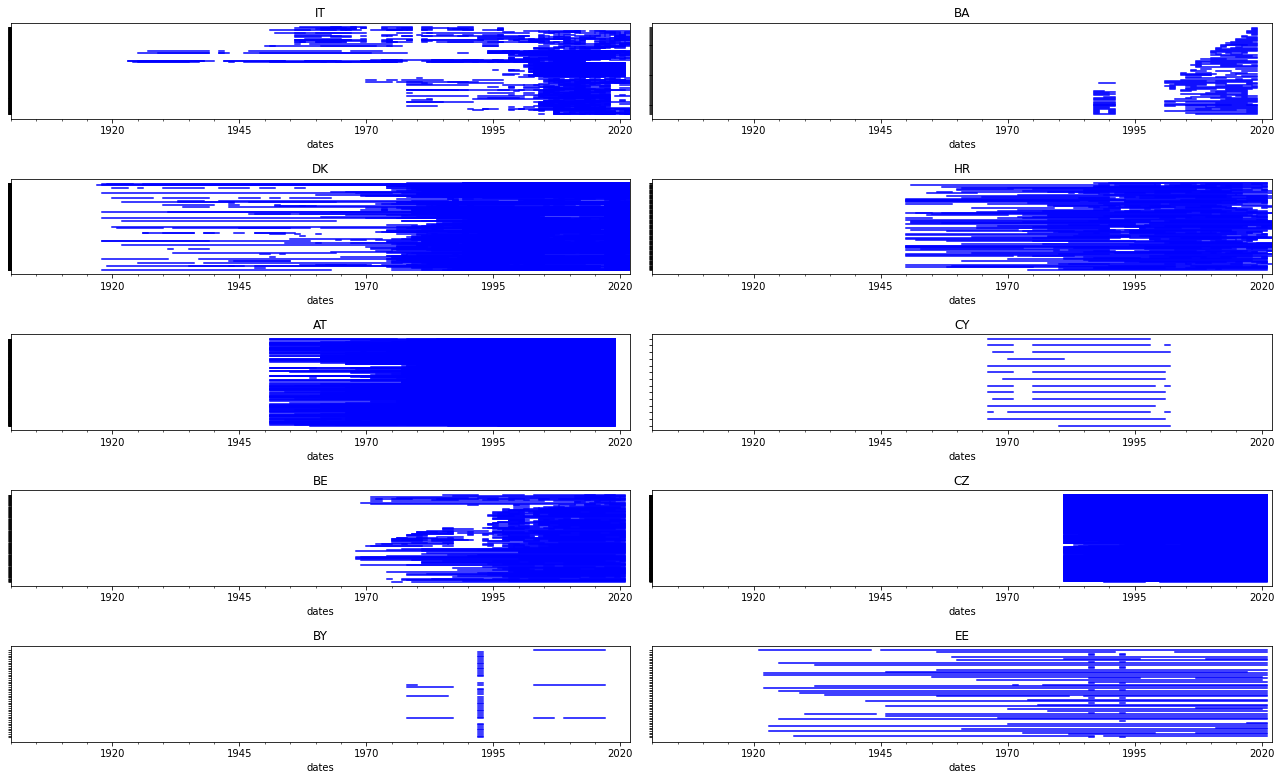

In [239]:
summarygapsstations_filter1.rename(columns={'country': "Country"}, inplace=True)


figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter1, 
               summarygapsstations = summarygapsstations_filter1,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')

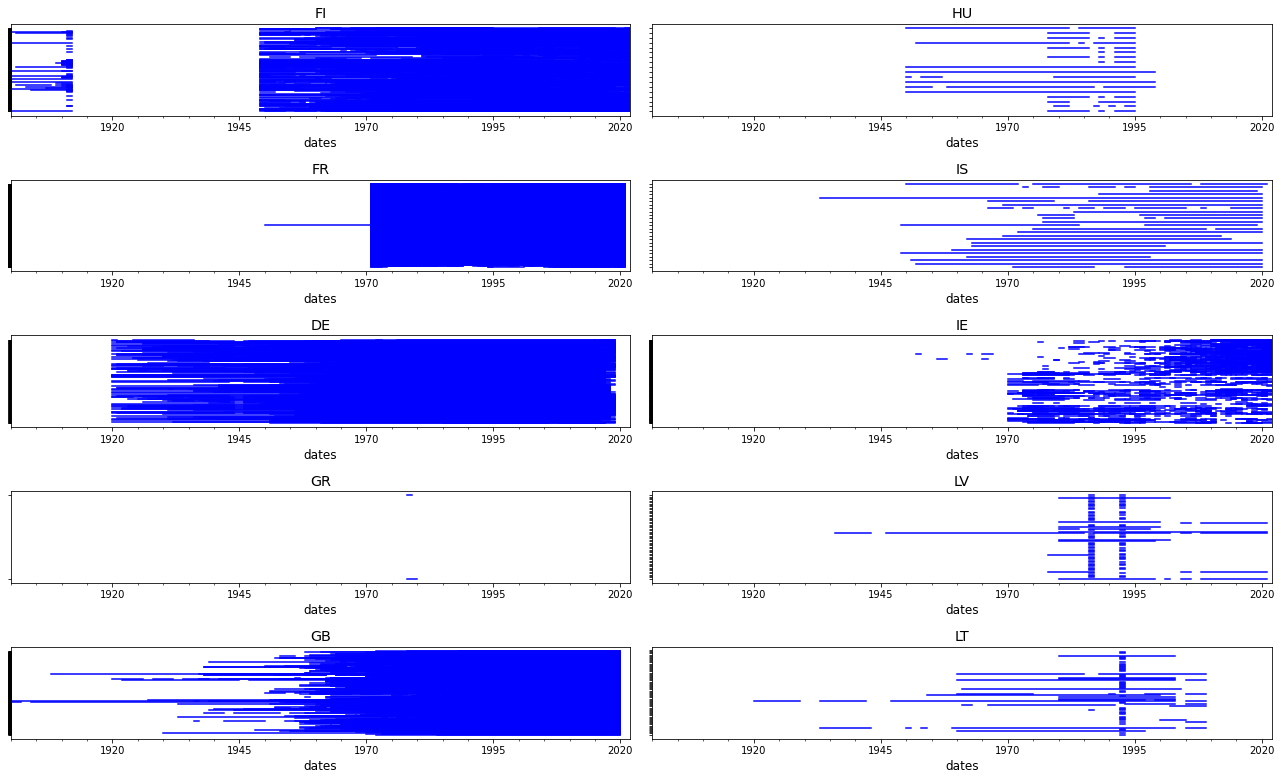

In [245]:
summarygapsstations_filter2.rename(columns={'country': "Country"}, inplace=True)


figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter2, 
               summarygapsstations = summarygapsstations_filter2,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')

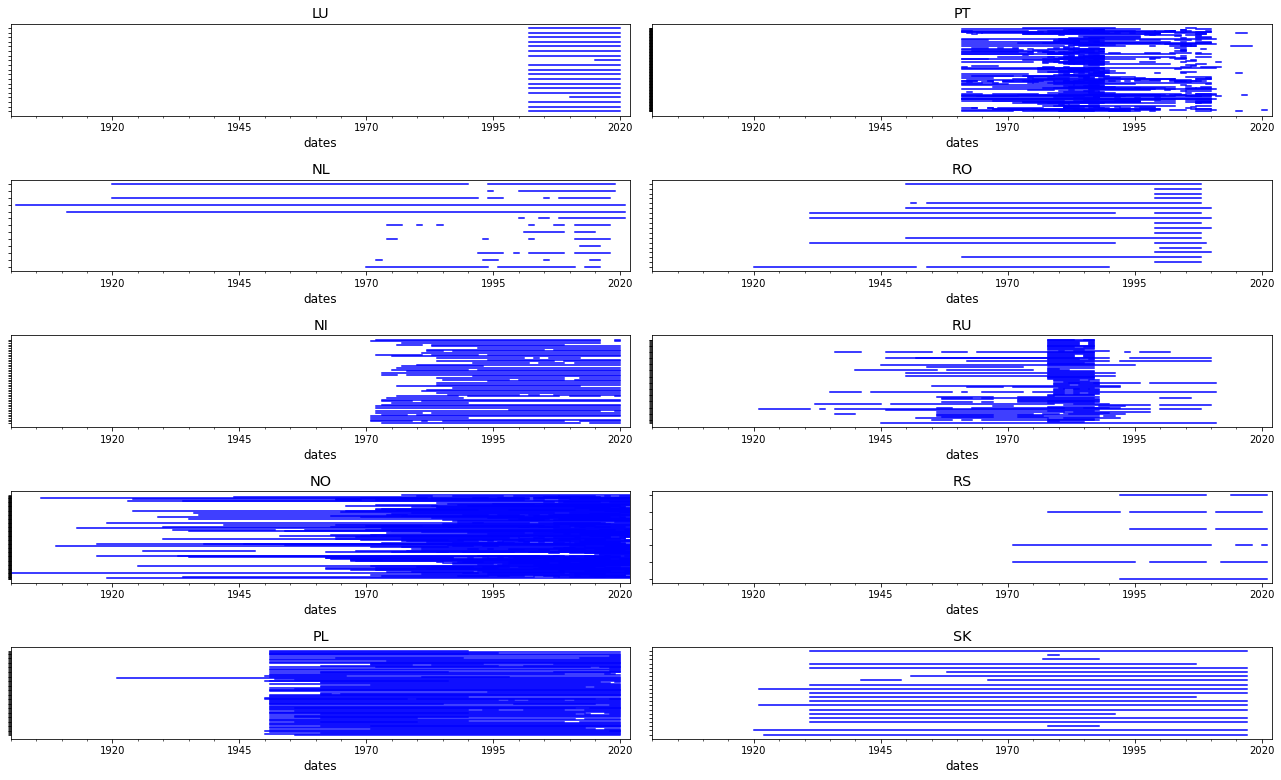

In [249]:
summarygapsstations_filter3.rename(columns={'country': "Country"}, inplace=True)


figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter3, 
               summarygapsstations = summarygapsstations_filter3,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')

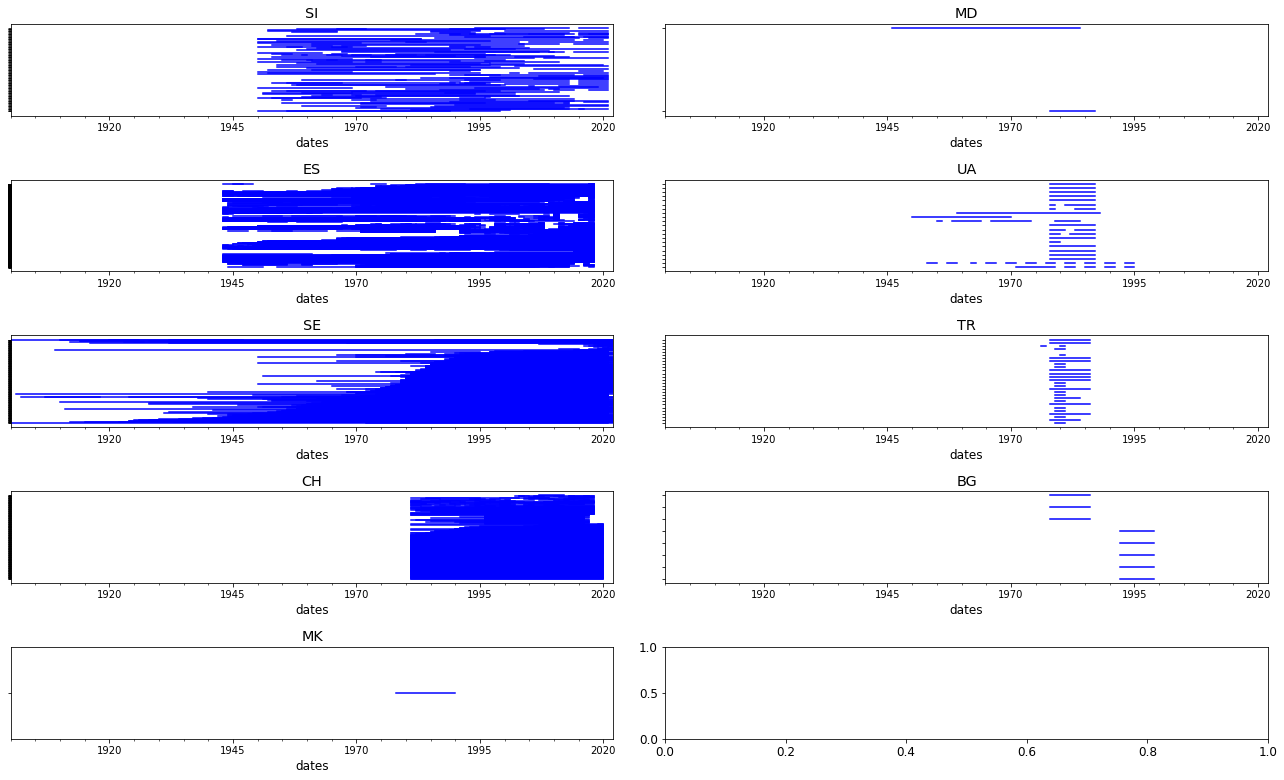

In [255]:
summarygapsstations_filter4.rename(columns={'country': "Country"}, inplace=True)


figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter4, 
               summarygapsstations = summarygapsstations_filter4,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')


KeyboardInterrupt



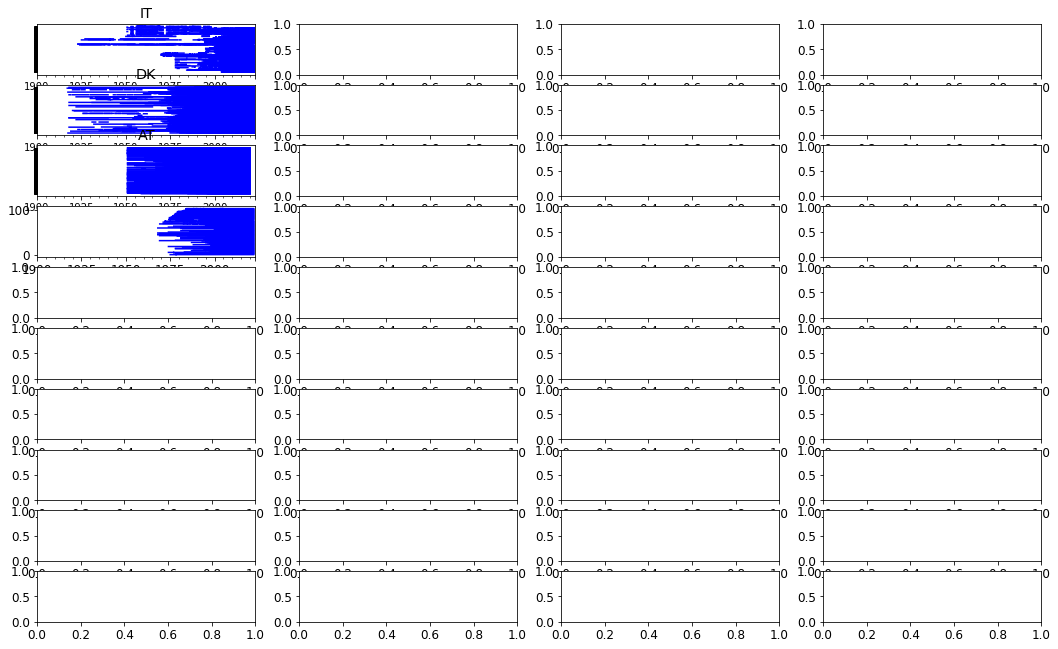

In [242]:
network_EU_full = network_EU_full_overview.copy()
network_EU_full.rename(columns={'country': "Country"}, inplace=True)


figplot, axesplot = geospatialfunctions.plotganntplots(numr = 10, numc = 4, timeseriesfinal_used = timeseries_EU, 
               summarygapsstations = network_EU_full,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')

In [17]:
import hydroanalysis

In [18]:
help(hydroanalysis)

Help on package hydroanalysis:

NAME
    hydroanalysis - Copyright 2021 Marco Dal Molin et al.

DESCRIPTION
    This file is part of HydroAnalysis.
    
    HydroAnalysis is free software: you can redistribute it and/or modify
    it under the terms of the GNU Lesser General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.
    
    HydroAnalysis is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU Lesser General Public License for more details.
    
    You should have received a copy of the GNU Lesser General Public License
    along with HydroAnalysis. If not, see <https://www.gnu.org/licenses/>.
    
    This file is part of the HydroAnalysis modelling framework. For details about it,
    visit the page https://hydroanalysis.readthedocs.io/
    
    CODED 

<AxesSubplot:xlabel='dates'>

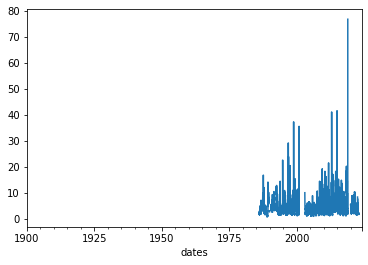

In [19]:
timeseries_EU.loc[:, "ITVEN429"].plot()

<AxesSubplot:xlabel='dates'>

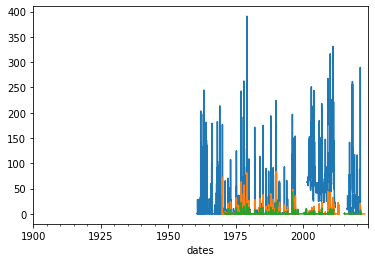

In [62]:
timeseries_EU.loc[:, "PT00102"].plot()
timeseries_EU.loc[:, "PT00004"].plot()
timeseries_EU.loc[:, "PT00056"].plot()

In [20]:
area1 = network_EU_full_overview.loc["ITVEN429", "area_calc"]
area1

131.348

In [25]:
streamflow1 = (timeseries_EU.loc["1990":"2015", "ITVEN429"] * 86400 * 1000) / (area1 * 1000000)
streamflow1

dates
1990-01-01         NaN
1990-01-02         NaN
1990-01-03         NaN
1990-01-04         NaN
1990-01-05         NaN
                ...   
2015-12-27    1.078783
2015-12-28    1.052471
2015-12-29    1.052471
2015-12-30    1.032737
2015-12-31    0.999848
Name: ITVEN429, Length: 9496, dtype: float64

In [26]:
quality1 = streamflow1.isna().astype(int)
quality1

dates
1990-01-01    1
1990-01-02    1
1990-01-03    1
1990-01-04    1
1990-01-05    1
             ..
2015-12-27    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
Name: ITVEN429, Length: 9496, dtype: int32

<AxesSubplot:xlabel='dates'>

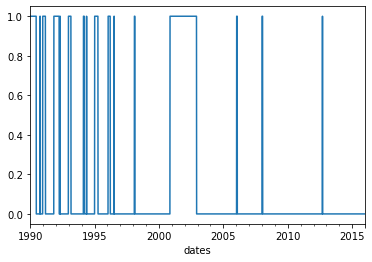

In [27]:
quality1.plot()

In [28]:
hydroanalysis.streamflow_signatures.calculate_q_mean(streamflow1.values, quality1.values)

2.3951626707463203

In [29]:
hydroanalysis.streamflow_signatures.calculate_baseflow_index(streamflow1.values, quality1.values, returnBF=True)

0.7161413430843759

In [136]:
data_comparation = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='D'))
data_comparation["Q"] = streamflow1.values
data_comparation["Qb"] = b 
data_comparation

Q        Qb
1981-01-01  0.821093  0.020002
1981-01-02  0.818109  0.033505
1981-01-03  0.972747  0.049694
1981-01-04  1.208002  0.068851
1981-01-05  1.497459  0.091726
...              ...       ...
2020-12-27  1.211630  0.556376
2020-12-28  1.409537  0.495224
2020-12-29  1.333702  0.424165
2020-12-30  1.415061  0.347120
2020-12-31  1.202281  0.269157

[14610 rows x 2 columns]

<AxesSubplot:>

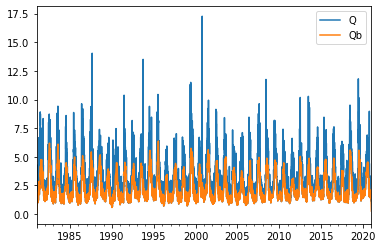

In [138]:
data_comparation.plot()

#### * Now we can start our gap analysis:

In [14]:
network_EU.set_index("new_code", inplace = True)


network_EU

Unnamed: 0     code                 name           river      area  \
new_code                                                                       
AT00001            0   200014                Bangs           Rhein    4647.9   
AT00002            1   200048  Schruns (Vonbunweg)            Litz     102.0   
AT00003            2   231662        Loruens-Aeule             Ill     535.2   
AT00004            3   200592    Kloesterle (OEBB)          Alfenz      66.6   
AT00005            4   200097  Buers (Bruecke L82)          Alvier      72.2   
...              ...      ...                  ...             ...       ...   
BG00004            3  6842800                 RUSE    DANUBE RIVER  669900.0   
BG00005            4  6842900             SILISTRA    DANUBE RIVER  689700.0   
BG00006            5  6864050          MARINO POLE    STRUMA RIVER   10243.0   
BG00007            6  6864800        KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008            7  6865600           SVILENGRAD   MARITSA RIVER   20857.0   

          elev        lon        lat country degimpact  lake  num_reservoir  \
new_code                                                                      
AT00001    420   9.534835  47.273748      AT         s   NaN            NaN   
AT00002    673   9.913677  47.080301      AT         l   NaN            NaN   
AT00003    579   9.847765  47.132821      AT         s   NaN            NaN   
AT00004   1014  10.061843  47.128994      AT         s   NaN            NaN   
AT00005    564   9.802668  47.150770      AT         s   NaN            NaN   
...        ...        ...        ...     ...       ...   ...            ...   
BG00004     12  25.950000  43.860000      BG       NaN   NaN            NaN   
BG00005      7  27.260000  44.130000      BG       NaN   NaN            NaN   
BG00006    NaN  23.350000  41.416668      BG       NaN   NaN            NaN   
BG00007    NaN  23.869583  41.525002      BG       NaN   NaN            NaN   
BG00008    NaN  26.200001  41.766666      BG       NaN   NaN            NaN   

           RE  
new_code       
AT00001   NaN  
AT00002   NaN  
AT00003   NaN  
AT00004   NaN  
AT00005   NaN  
...       ...  
BG00004   NaN  
BG00005   NaN  
BG00006   NaN  
BG00007   NaN  
BG00008   NaN  

[11570 rows x 13 columns]

In [15]:
coords = network_EU[["lon", "lat"]].copy()
coords

lon        lat
new_code                      
AT00001    9.534835  47.273748
AT00002    9.913677  47.080301
AT00003    9.847765  47.132821
AT00004   10.061843  47.128994
AT00005    9.802668  47.150770
...             ...        ...
BG00004   25.950000  43.860000
BG00005   27.260000  44.130000
BG00006   23.350000  41.416668
BG00007   23.869583  41.525002
BG00008   26.200001  41.766666

[11570 rows x 2 columns]

In [16]:
summarygapsstations = geospatialfunctions.summarygaps(timeseries_EU.loc["1950":"2020",:], coords)
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps
Code                                                  
AT00001   9.534835  47.273748  17167.0       66.197509
AT00002   9.913677  47.080301   3561.0       13.731539
AT00003   9.847765  47.132821  13151.0       50.711449
AT00004  10.061843  47.128994  17899.0       69.020167
AT00005   9.802668  47.150770  14976.0       57.748814
...            ...        ...      ...             ...
BG00004  25.950000  43.860000  23011.0       88.732503
BG00005  27.260000  44.130000  23011.0       88.732503
BG00006  23.350000  41.416668  22646.0       87.325030
BG00007  23.869583  41.525002  22646.0       87.325030
BG00008  26.200001  41.766666  22646.0       87.325030

[11570 rows x 4 columns]

In [17]:
network_EU["PercentageGaps"] = summarygapsstations["PercentageGaps"]
network_EU

Unnamed: 0     code                 name           river      area  \
new_code                                                                       
AT00001            0   200014                Bangs           Rhein    4647.9   
AT00002            1   200048  Schruns (Vonbunweg)            Litz     102.0   
AT00003            2   231662        Loruens-Aeule             Ill     535.2   
AT00004            3   200592    Kloesterle (OEBB)          Alfenz      66.6   
AT00005            4   200097  Buers (Bruecke L82)          Alvier      72.2   
...              ...      ...                  ...             ...       ...   
BG00004            3  6842800                 RUSE    DANUBE RIVER  669900.0   
BG00005            4  6842900             SILISTRA    DANUBE RIVER  689700.0   
BG00006            5  6864050          MARINO POLE    STRUMA RIVER   10243.0   
BG00007            6  6864800        KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008            7  6865600           SVILENGRAD   MARITSA RIVER   20857.0   

          elev        lon        lat country degimpact  lake  num_reservoir  \
new_code                                                                      
AT00001    420   9.534835  47.273748      AT         s   NaN            NaN   
AT00002    673   9.913677  47.080301      AT         l   NaN            NaN   
AT00003    579   9.847765  47.132821      AT         s   NaN            NaN   
AT00004   1014  10.061843  47.128994      AT         s   NaN            NaN   
AT00005    564   9.802668  47.150770      AT         s   NaN            NaN   
...        ...        ...        ...     ...       ...   ...            ...   
BG00004     12  25.950000  43.860000      BG       NaN   NaN            NaN   
BG00005      7  27.260000  44.130000      BG       NaN   NaN            NaN   
BG00006    NaN  23.350000  41.416668      BG       NaN   NaN            NaN   
BG00007    NaN  23.869583  41.525002      BG       NaN   NaN            NaN   
BG00008    NaN  26.200001  41.766666      BG       NaN   NaN            NaN   

           RE  PercentageGaps  
new_code                       
AT00001   NaN       66.197509  
AT00002   NaN       13.731539  
AT00003   NaN       50.711449  
AT00004   NaN       69.020167  
AT00005   NaN       57.748814  
...       ...             ...  
BG00004   NaN       88.732503  
BG00005   NaN       88.732503  
BG00006   NaN       87.325030  
BG00007   NaN       87.325030  
BG00008   NaN       87.325030  

[11570 rows x 14 columns]

(<Figure size 1080x2160 with 2 Axes>, <AxesSubplot:>)

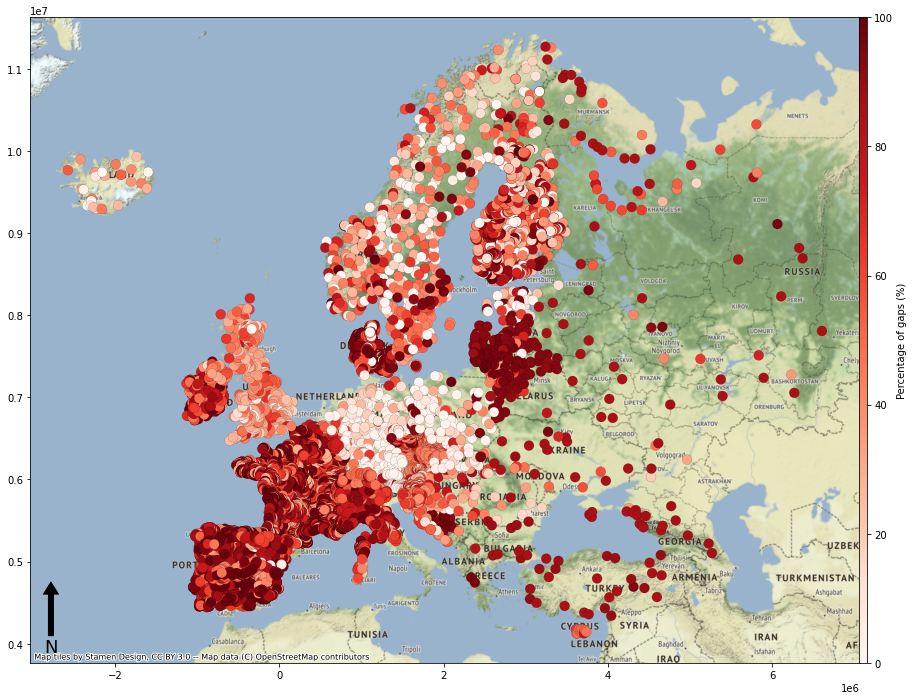

In [18]:
geospatialfunctions.plotgapsmap(summarygapsstations = summarygapsstations, crsproj = 'epsg:4326', backmapproj = True, 
                             figsizeproj = (15, 30), cmapproj = "Reds", markersize_map = 100)

Now we can check the total of gauges when we set a maximum number of gaps:

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

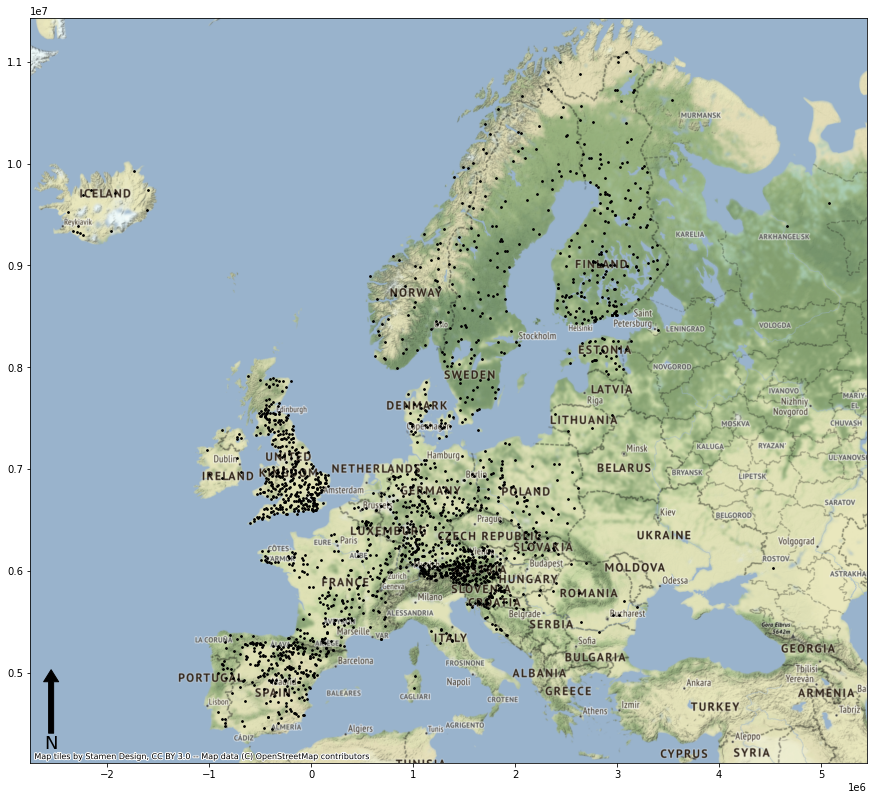

In [19]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 30.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [20]:
summarygapsstations[summarygapsstations.PercentageGaps < 30.0]

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
AT00002   9.913677  47.080301   3561.0       13.731539   
AT00006   9.875898  47.226658   5479.0       21.127521   
AT00009   9.578880  47.260362    731.0        2.818802   
AT00010   9.728853  47.256933   2560.0        9.871592   
AT00013   9.662666  47.451644    731.0        2.818802   
...            ...        ...      ...             ...   
SE00284  14.620500  56.120300      0.0        0.000000   
SE00285  15.525200  61.362300      0.0        0.000000   
SE00286  11.536800  58.877100      0.0        0.000000   
SE00287  16.163900  56.999600      0.0        0.000000   
SE00290  15.709200  62.819300      0.0        0.000000   

                          geometry  
Code                                
AT00002   POINT (9.91368 47.08030)  
AT00006   POINT (9.87590 47.22666)  
AT00009   POINT (9.57888 47.26036)  
AT00010   POINT (9.72885 47.25693)  
AT00013   POINT (9.66267 47.45164)  
...                            ...  
SE00284  POINT (14.62050 56.12030)  
SE00285  POINT (15.52520 61.36230)  
SE00286  POINT (11.53680 58.87710)  
SE00287  POINT (16.16390 56.99960)  
SE00290  POINT (15.70920 62.81930)  

[2016 rows x 5 columns]

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

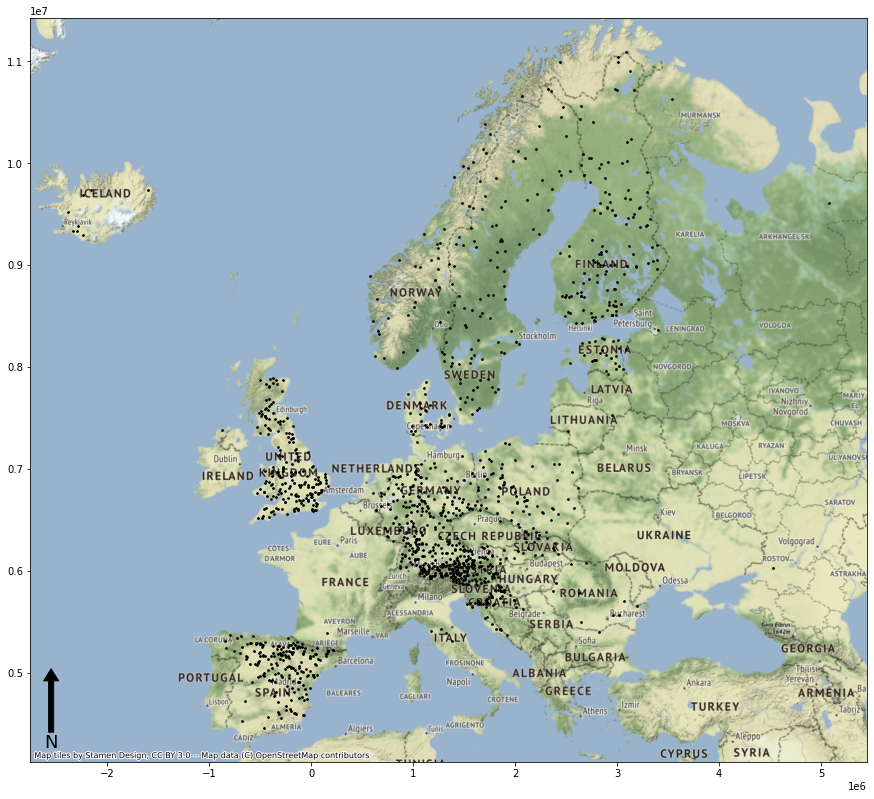

In [21]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 20.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [22]:
summarygapsstations[summarygapsstations.PercentageGaps < 20.0]

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
AT00002   9.913677  47.080301   3561.0       13.731539   
AT00009   9.578880  47.260362    731.0        2.818802   
AT00010   9.728853  47.256933   2560.0        9.871592   
AT00013   9.662666  47.451644    731.0        2.818802   
AT00014   9.761625  47.397152   2557.0        9.860024   
...            ...        ...      ...             ...   
SE00284  14.620500  56.120300      0.0        0.000000   
SE00285  15.525200  61.362300      0.0        0.000000   
SE00286  11.536800  58.877100      0.0        0.000000   
SE00287  16.163900  56.999600      0.0        0.000000   
SE00290  15.709200  62.819300      0.0        0.000000   

                          geometry  
Code                                
AT00002   POINT (9.91368 47.08030)  
AT00009   POINT (9.57888 47.26036)  
AT00010   POINT (9.72885 47.25693)  
AT00013   POINT (9.66267 47.45164)  
AT00014   POINT (9.76162 47.39715)  
...                            ...  
SE00284  POINT (14.62050 56.12030)  
SE00285  POINT (15.52520 61.36230)  
SE00286  POINT (11.53680 58.87710)  
SE00287  POINT (16.16390 56.99960)  
SE00290  POINT (15.70920 62.81930)  

[1332 rows x 5 columns]

(<Figure size 1080x2160 with 1 Axes>, <AxesSubplot:>)

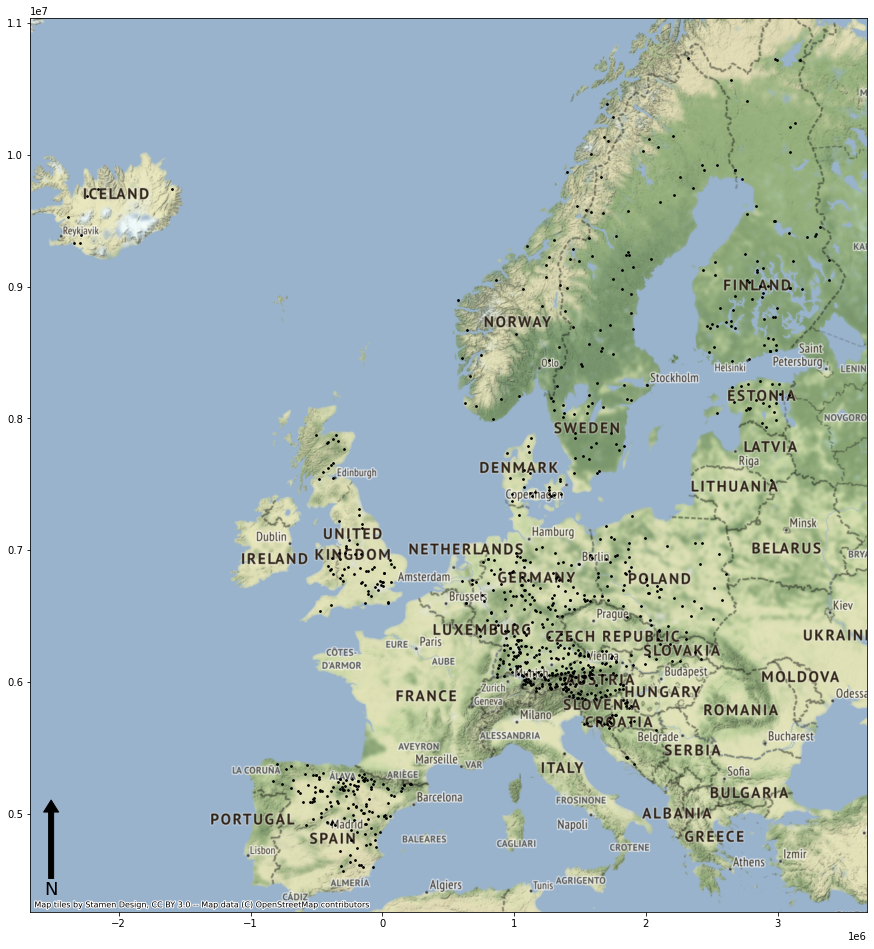

In [23]:
geospatialfunctions.plotpointsmap(summarygapsstations[summarygapsstations.PercentageGaps < 10.0], 
                                  crsproj = 'epsg:4326', showcodes = False)

In [24]:
summarygapsstations[summarygapsstations.PercentageGaps < 10.0]

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
AT00009   9.578880  47.260362    731.0        2.818802   
AT00010   9.728853  47.256933   2560.0        9.871592   
AT00013   9.662666  47.451644    731.0        2.818802   
AT00014   9.761625  47.397152   2557.0        9.860024   
AT00016   9.700322  47.447748   2557.0        9.860024   
...            ...        ...      ...             ...   
SE00284  14.620500  56.120300      0.0        0.000000   
SE00285  15.525200  61.362300      0.0        0.000000   
SE00286  11.536800  58.877100      0.0        0.000000   
SE00287  16.163900  56.999600      0.0        0.000000   
SE00290  15.709200  62.819300      0.0        0.000000   

                          geometry  
Code                                
AT00009   POINT (9.57888 47.26036)  
AT00010   POINT (9.72885 47.25693)  
AT00013   POINT (9.66267 47.45164)  
AT00014   POINT (9.76162 47.39715)  
AT00016   POINT (9.70032 47.44775)  
...                            ...  
SE00284  POINT (14.62050 56.12030)  
SE00285  POINT (15.52520 61.36230)  
SE00286  POINT (11.53680 58.87710)  
SE00287  POINT (16.16390 56.99960)  
SE00290  POINT (15.70920 62.81930)  

[885 rows x 5 columns]

In [25]:
network_EU

Unnamed: 0     code                 name           river      area  \
new_code                                                                       
AT00001            0   200014                Bangs           Rhein    4647.9   
AT00002            1   200048  Schruns (Vonbunweg)            Litz     102.0   
AT00003            2   231662        Loruens-Aeule             Ill     535.2   
AT00004            3   200592    Kloesterle (OEBB)          Alfenz      66.6   
AT00005            4   200097  Buers (Bruecke L82)          Alvier      72.2   
...              ...      ...                  ...             ...       ...   
BG00004            3  6842800                 RUSE    DANUBE RIVER  669900.0   
BG00005            4  6842900             SILISTRA    DANUBE RIVER  689700.0   
BG00006            5  6864050          MARINO POLE    STRUMA RIVER   10243.0   
BG00007            6  6864800        KHADZHIDIMOVO  NESTOS POTAMOS    2260.0   
BG00008            7  6865600           SVILENGRAD   MARITSA RIVER   20857.0   

          elev        lon        lat country degimpact  lake  num_reservoir  \
new_code                                                                      
AT00001    420   9.534835  47.273748      AT         s   NaN            NaN   
AT00002    673   9.913677  47.080301      AT         l   NaN            NaN   
AT00003    579   9.847765  47.132821      AT         s   NaN            NaN   
AT00004   1014  10.061843  47.128994      AT         s   NaN            NaN   
AT00005    564   9.802668  47.150770      AT         s   NaN            NaN   
...        ...        ...        ...     ...       ...   ...            ...   
BG00004     12  25.950000  43.860000      BG       NaN   NaN            NaN   
BG00005      7  27.260000  44.130000      BG       NaN   NaN            NaN   
BG00006    NaN  23.350000  41.416668      BG       NaN   NaN            NaN   
BG00007    NaN  23.869583  41.525002      BG       NaN   NaN            NaN   
BG00008    NaN  26.200001  41.766666      BG       NaN   NaN            NaN   

           RE  PercentageGaps  
new_code                       
AT00001   NaN       66.197509  
AT00002   NaN       13.731539  
AT00003   NaN       50.711449  
AT00004   NaN       69.020167  
AT00005   NaN       57.748814  
...       ...             ...  
BG00004   NaN       88.732503  
BG00005   NaN       88.732503  
BG00006   NaN       87.325030  
BG00007   NaN       87.325030  
BG00008   NaN       87.325030  

[11570 rows x 14 columns]

In [26]:
summarygapsstations["Country"] = network_EU["country"]
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps  \
Code                                                     
AT00001   9.534835  47.273748  17167.0       66.197509   
AT00002   9.913677  47.080301   3561.0       13.731539   
AT00003   9.847765  47.132821  13151.0       50.711449   
AT00004  10.061843  47.128994  17899.0       69.020167   
AT00005   9.802668  47.150770  14976.0       57.748814   
...            ...        ...      ...             ...   
BG00004  25.950000  43.860000  23011.0       88.732503   
BG00005  27.260000  44.130000  23011.0       88.732503   
BG00006  23.350000  41.416668  22646.0       87.325030   
BG00007  23.869583  41.525002  22646.0       87.325030   
BG00008  26.200001  41.766666  22646.0       87.325030   

                          geometry Country  
Code                                        
AT00001   POINT (9.53484 47.27375)      AT  
AT00002   POINT (9.91368 47.08030)      AT  
AT00003   POINT (9.84777 47.13282)      AT  
AT00004  POINT (10.06184 47.12899)      AT  
AT00005   POINT (9.80267 47.15077)      AT  
...                            ...     ...  
BG00004  POINT (25.95000 43.86000)      BG  
BG00005  POINT (27.26000 44.13000)      BG  
BG00006  POINT (23.35000 41.41667)      BG  
BG00007  POINT (23.86958 41.52500)      BG  
BG00008  POINT (26.20000 41.76667)      BG  

[11570 rows x 6 columns]

Since the processing would be too high to print all together, we can print per part:

In [27]:
countries = list(summarygapsstations.Country.unique())
countries

['AT',
 'BE',
 'BY',
 'BA',
 'HR',
 'CY',
 'CZ',
 'DK',
 'EE',
 'FI',
 'FR',
 'DE',
 'GR',
 'GB',
 'HU',
 'IS',
 'IE',
 'IT',
 'LV',
 'LT',
 'LU',
 'NL',
 'NI',
 'NO',
 'PL',
 'PT',
 'RO',
 'RU',
 'RS',
 'SK',
 'SI',
 'ES',
 'SE',
 'CH',
 'MK',
 'MD',
 'UA',
 'TR',
 'BG']

In [43]:
summarygapsstations['Country'].isin([countries[0:10]])

Code
AT00001    False
AT00002    False
AT00003    False
AT00004    False
AT00005    False
           ...  
BG00004    False
BG00005    False
BG00006    False
BG00007    False
BG00008    False
Name: Country, Length: 11570, dtype: bool

In [47]:
summarygapsstations

CoordX     CoordY  NumGaps  PercentageGaps Country
Code                                                          
AT00001   9.534835  47.273748  17167.0       66.197509      AT
AT00002   9.913677  47.080301   3561.0       13.731539      AT
AT00003   9.847765  47.132821  13151.0       50.711449      AT
AT00004  10.061843  47.128994  17899.0       69.020167      AT
AT00005   9.802668  47.150770  14976.0       57.748814      AT
...            ...        ...      ...             ...     ...
BG00004  25.950000  43.860000  23011.0       88.732503      BG
BG00005  27.260000  44.130000  23011.0       88.732503      BG
BG00006  23.350000  41.416668  22646.0       87.325030      BG
BG00007  23.869583  41.525002  22646.0       87.325030      BG
BG00008  26.200001  41.766666  22646.0       87.325030      BG

[11570 rows x 5 columns]

In [51]:
summarygapsstations_filter1 = summarygapsstations[summarygapsstations['Country'].isin(countries[0:10])]
summarygapsstations_filter1

CoordX     CoordY  NumGaps  PercentageGaps Country
Code                                                          
AT00001   9.534835  47.273748  17167.0       66.197509      AT
AT00002   9.913677  47.080301   3561.0       13.731539      AT
AT00003   9.847765  47.132821  13151.0       50.711449      AT
AT00004  10.061843  47.128994  17899.0       69.020167      AT
AT00005   9.802668  47.150770  14976.0       57.748814      AT
...            ...        ...      ...             ...     ...
FI00665  27.155087  66.340055   5775.0       22.268924      FI
FI00666  26.950329  66.321034  20455.0       78.876335      FI
FI00667  26.155849  66.410076  25933.0      100.000000      FI
FI00668  26.685973  66.367788   7943.0       30.628928      FI
FI00669  26.826482  66.373660  12853.0       49.562334      FI

[3351 rows x 5 columns]

In [58]:
timeseries_EU_filter1 = timeseries_EU.loc[:, summarygapsstations_filter1.index.tolist()]
timeseries_EU_filter1

AT00001  AT00002  AT00003  AT00004  AT00005  AT00006  AT00007  \
dates                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            AT00008  AT00009  AT00010  ...  FI00660  FI00661  FI00662  \
dates                                  ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            FI00663  FI00664  FI00665  FI00666  FI00667  FI00668  FI00669  
dates                                                                      
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[45290 rows x 3351 columns]


KeyboardInterrupt



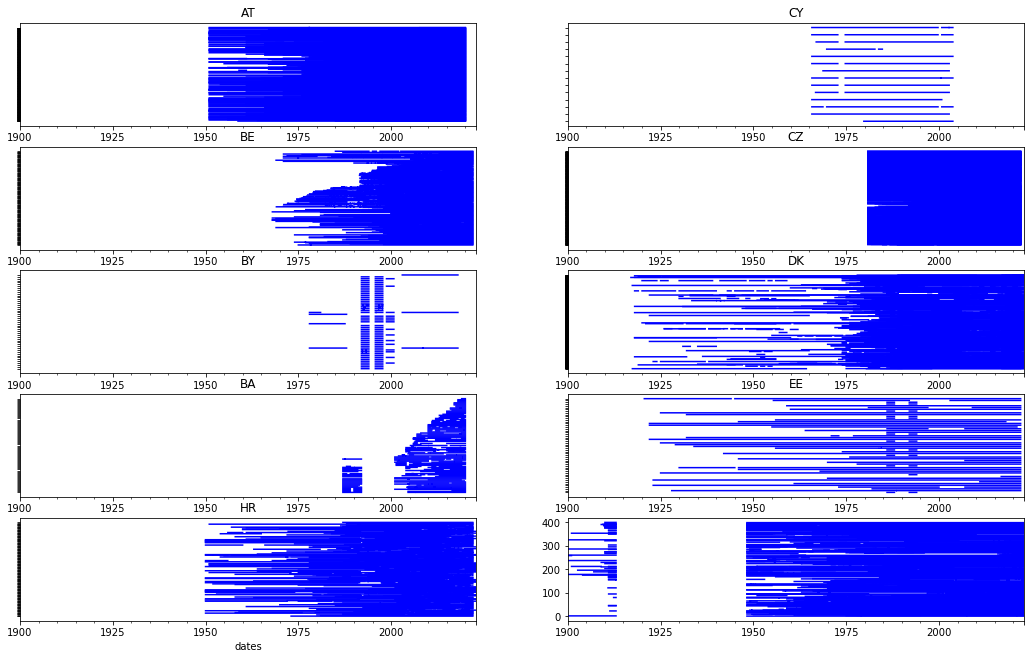

In [59]:
figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter1, 
               summarygapsstations = summarygapsstations_filter1,
               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
                                                      time_range_year_ini='1900', time_range_year_fin='2022')

In [65]:
summarygapsstations_filter2 = summarygapsstations[summarygapsstations['Country'].isin(countries[10:20])]
summarygapsstations_filter2

CoordX     CoordY  NumGaps  PercentageGaps Country
Code                                                          
FR00001   7.606153  47.556970  23342.0       90.008869      FR
FR00002   7.528982  47.564377  16029.0       61.809278      FR
FR00003   7.508168  47.587489  25077.0       96.699186      FR
FR00004   7.545294  47.603575  25540.0       98.484556      FR
FR00005   7.556488  47.596980  25717.0       99.167084      FR
...            ...        ...      ...             ...     ...
LT00072  25.109400  54.448400  25752.0       99.302048      LT
LT00073  25.103600  54.448200  25021.0       96.483245      LT
LT00074  24.500000  54.116667  25021.0       96.483245      LT
LT00075  22.692300  55.173600  25387.0       97.894574      LT
LT00076  22.666667  55.133333  25752.0       99.302048      LT

[5216 rows x 5 columns]

In [66]:
timeseries_EU_filter2 =timeseries_EU.loc[:, summarygapsstations_filter2.index.tolist()]
timeseries_EU_filter2

FR00001  FR00002  FR00003  FR00004  FR00005  FR00006  FR00007  \
dates                                                                       
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            FR00008  FR00009  FR00010  ...  LT00067  LT00068  LT00069  \
dates                                  ...                              
1900-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-03      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-04      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1900-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-12-27      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-28      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-29      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-30      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2023-12-31      NaN      NaN      NaN  ...      NaN      NaN      NaN   

            LT00070  LT00071  LT00072  LT00073  LT00074  LT00075  LT00076  
dates                                                                      
1900-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-03      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-04      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1900-01-05      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-12-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2023-12-31      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[45290 rows x 5216 columns]

In [69]:
#figplot, axesplot = geospatialfunctions.plotganntplots(numr = 5, numc = 2, timeseriesfinal_used = timeseries_EU_filter2, 
#               summarygapsstations = summarygapsstations_filter2,
#               setylim = False,  ymin = 0, ymax = 100, figsize_chart = (18, 11), 
#                color_chart = "blue", fontsize_chart = 10, facecolor_chart = "white", title_chart = "Title", 
#                                                      time_range_year_ini='1900', time_range_year_fin='2022')

#### * Here we can check for the number of stations at each country without information regarding the area and level:

In [34]:
stationsdescribe = pd.DataFrame()
stationsdescribe["no_stations"] = network_EU.loc[:,["code", "country"]].groupby(by=["country"]).count()
stationsdescribe["no_areas"] = network_EU.loc[:,["area", "country"]].groupby(by=["country"]).count()
stationsdescribe["no_levels"] = network_EU.loc[:,["elev", "country"]].groupby(by=["country"]).count()

stationsdescribe

no_stations  no_areas  no_levels
country                                  
AT               599       599        599
BA                91        49         91
BE               168       144          0
BG                 8         8          5
BY                51        48          2
CH               298       298        298
CY                14        14         14
CZ               538       536          0
DE               336       335        332
DK              1009      1009          0
EE                54        54         54
ES              1440      1440       1433
FI               669       543          0
FR              3158      2704       2723
GB               671       671        671
GR                 2         2          2
HR               158       111          0
HU                18        18         17
IE               464       448          0
IS                25        25         25
IT               405       320        335
LT                76        71         71
LU                19        19          0
LV                61        61         51
MD                 2         2          2
MK                 1         1          1
NI                51        51         51
NL                13        13          3
NO               189       184          0
PL               103       103        103
PT               280       255        280
RO                18        18         18
RS                 6         6          6
RU                98        98         42
SE               290       289          0
SI               117       100        110
SK                21        21         19
TR                28        28         18
UA                21        21         12

In [35]:
stationsdescribe.no_stations.sum() - stationsdescribe.no_areas.sum()

853

In [33]:
network_EU['area'].isna().sum()

853

Now we can analyze the delineated boundaries we had
